In [1]:
# import the required libraries

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import math
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns

In [2]:
# import the data
# we have data for four timeperiods, daily, weekly, monthly and hourly

data_d = pd.read_csv('salesdaily.csv')
data_w = pd.read_csv('salesweekly.csv')
data_m = pd.read_csv('salesmonthly.csv')

data_list = [data_d, data_w, data_m]

In [3]:
data_d.head()

datum  M01AB  M01AE  N02BA  N02BE  N05B  N05C   R03  R06  Year  Month  \
0  1/2/2014    0.0   3.67    3.4  32.40   7.0   0.0   0.0  2.0  2014      1   
1  1/3/2014    8.0   4.00    4.4  50.60  16.0   0.0  20.0  4.0  2014      1   
2  1/4/2014    2.0   1.00    6.5  61.85  10.0   0.0   9.0  1.0  2014      1   
3  1/5/2014    4.0   3.00    7.0  41.10   8.0   0.0   3.0  0.0  2014      1   
4  1/6/2014    5.0   1.00    4.5  21.70  16.0   2.0   6.0  2.0  2014      1   

   Hour Weekday Name  
0   248     Thursday  
1   276       Friday  
2   276     Saturday  
3   276       Sunday  
4   276       Monday

In [4]:
data_w.head()

datum  M01AB  M01AE  N02BA   N02BE  N05B  N05C   R03   R06
0   1/5/2014  14.00  11.67   21.3  185.95  41.0   0.0  32.0   7.0
1  1/12/2014  29.33  12.68   37.9  190.70  88.0   5.0  21.0   7.2
2  1/19/2014  30.67  26.34   45.9  218.40  80.0   8.0  29.0  12.0
3  1/26/2014  34.00  32.37   31.5  179.60  80.0   8.0  23.0  10.0
4   2/2/2014  31.02  23.35   20.7  159.88  84.0  12.0  29.0  12.0

In [5]:
data_m.head()

datum   M01AB    M01AE    N02BA     N02BE   N05B  N05C    R03    R06
0  2014-01-31  127.69   99.090  152.100   878.030  354.0  50.0  112.0   48.2
1  2014-02-28  133.32  126.050  177.000  1001.900  347.0  31.0  122.0   36.2
2  2014-03-31  137.44   92.950  147.655   779.275  232.0  20.0  112.0   85.4
3  2014-04-30  113.10   89.475  130.900   698.500  209.0  18.0   97.0   73.7
4  2014-05-31  101.79  119.933  132.100   628.780  270.0  23.0  107.0  123.7

In [6]:
data_d.describe()

M01AB        M01AE        N02BA        N02BE         N05B  \
count  2106.000000  2106.000000  2106.000000  2106.000000  2106.000000   
mean      5.033683     3.895830     3.880441    29.917095     8.853627   
std       2.737579     2.133337     2.384010    15.590966     5.605605   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       3.000000     2.340000     2.000000    19.000000     5.000000   
50%       4.990000     3.670000     3.500000    26.900000     8.000000   
75%       6.670000     5.138000     5.200000    38.300000    12.000000   
max      17.340000    14.463000    16.000000   161.000000    54.833333   

              N05C          R03          R06         Year        Month  \
count  2106.000000  2106.000000  2106.000000  2106.000000  2106.000000   
mean      0.593522     5.512262     2.900198  2016.401235     6.344255   
std       1.092988     6.428736     2.415816     1.665060     3.386954   
min       0.000000     0.000000     0.000000  2014.000000     1.000000   
25%       0.000000     1.000000     1.000000  2015.000000     3.000000   
50%       0.000000     4.000000     2.000000  2016.000000     6.000000   
75%       1.000000     8.000000     4.000000  2018.000000     9.000000   
max       9.000000    45.000000    15.000000  2019.000000    12.000000   

              Hour  
count  2106.000000  
mean    275.945869  
std       1.970547  
min     190.000000  
25%     276.000000  
50%     276.000000  
75%     276.000000  
max     276.000000

In [7]:
data_w.describe()

M01AB       M01AE       N02BA       N02BE        N05B        N05C  \
count  302.000000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean    35.102441   27.167611   27.060295  208.627161   61.740853    4.138935   
std      8.617106    7.043491    8.086458   76.069221   22.436970    3.129265   
min      7.670000    6.237000    3.500000   86.250000   18.000000    0.000000   
25%     29.387500   22.387500   21.300000  149.300000   47.000000    2.000000   
50%     34.565000   26.789500   26.500000  198.300000   57.000000    3.979167   
75%     40.175000   31.046500   32.475000  252.471500   71.000000    6.000000   
max     65.330000   53.571000   60.125000  546.899000  154.000000   17.000000   

              R03         R06  
count  302.000000  302.000000  
mean    38.439811   20.224561  
std     22.900873   11.381464  
min      2.000000    1.000000  
25%     21.000000   11.475000  
50%     35.000000   17.500000  
75%     51.000000   26.000000  
max    131.000000   65.000000

In [8]:
data_m.describe()

M01AB       M01AE       N02BA        N02BE        N05B       N05C  \
count   70.000000   70.000000   70.000000    70.000000   70.000000  70.000000   
mean   149.992000  116.514286  115.020843   892.542071  262.118571  17.842857   
std     31.485325   27.889336   31.245899   338.843908   85.060930   8.481242   
min      0.000000    0.000000    0.000000     0.000000    1.000000   0.000000   
25%    137.490000  103.518250   94.375000   648.187500  223.750000  12.000000   
50%    154.635000  114.840000  117.225000   865.824500  250.300000  18.000000   
75%    169.000000  128.359750  133.837500  1061.580000  293.650000  23.000000   
max    211.130000  222.351000  191.600000  1856.815000  492.000000  50.000000   

              R03         R06  
count   70.000000   70.000000  
mean   167.675000   86.662571  
std     81.767979   45.859336  
min      0.000000    0.000000  
25%    112.000000   49.875000  
50%    160.000000   74.100000  
75%    218.250000  119.807500  
max    386.000000  213.040000

In [9]:
# we have no missing value in our dataset as the data is already pre-processed.
# Highest quantity of N02BE while lowest quantity of N05C is observed.
# mean and mode of the quantity of all categories of drugs are somewhat close which is good sign to perform analysis easily.

In [10]:
data_d['datum'] = pd.to_datetime(data_d['datum'])
data_w['datum'] = pd.to_datetime(data_w['datum'])
data_m['datum'] = pd.to_datetime(data_m['datum'])

data_d.set_index('datum', inplace=True)
data_w.set_index('datum', inplace=True)
data_m.set_index('datum', inplace=True)

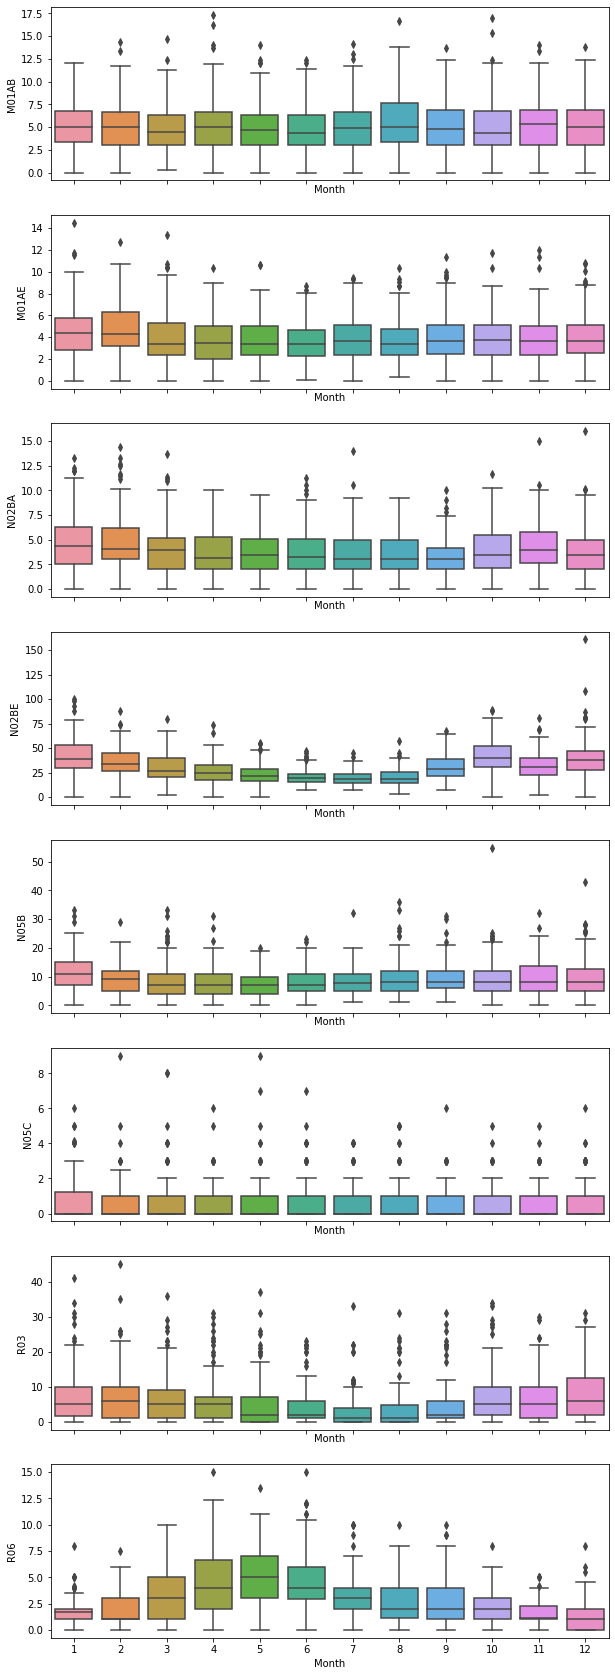

In [11]:
# Below plot shows the quantity sold in a particular month in total
# This will give if any particular month has observed highest or lowest sale for any reason.

fig, axes = plt.subplots(8, 1, figsize = (10, 30), sharex = True)
for name, ax in zip(['M01AB','M01AE','N02BA','N02BE', 'N05B','N05C','R03','R06'], axes):
    sns.boxplot(data = data_d, x = 'Month', y = name, ax = ax)

In [12]:
# above are the boxplots to observe mothly-seasonality. 
# seasonality is confirmed for NO2BE, R03, R06 as quantity is changing with months. 
# there are larger number of outliers for R03 and N05C

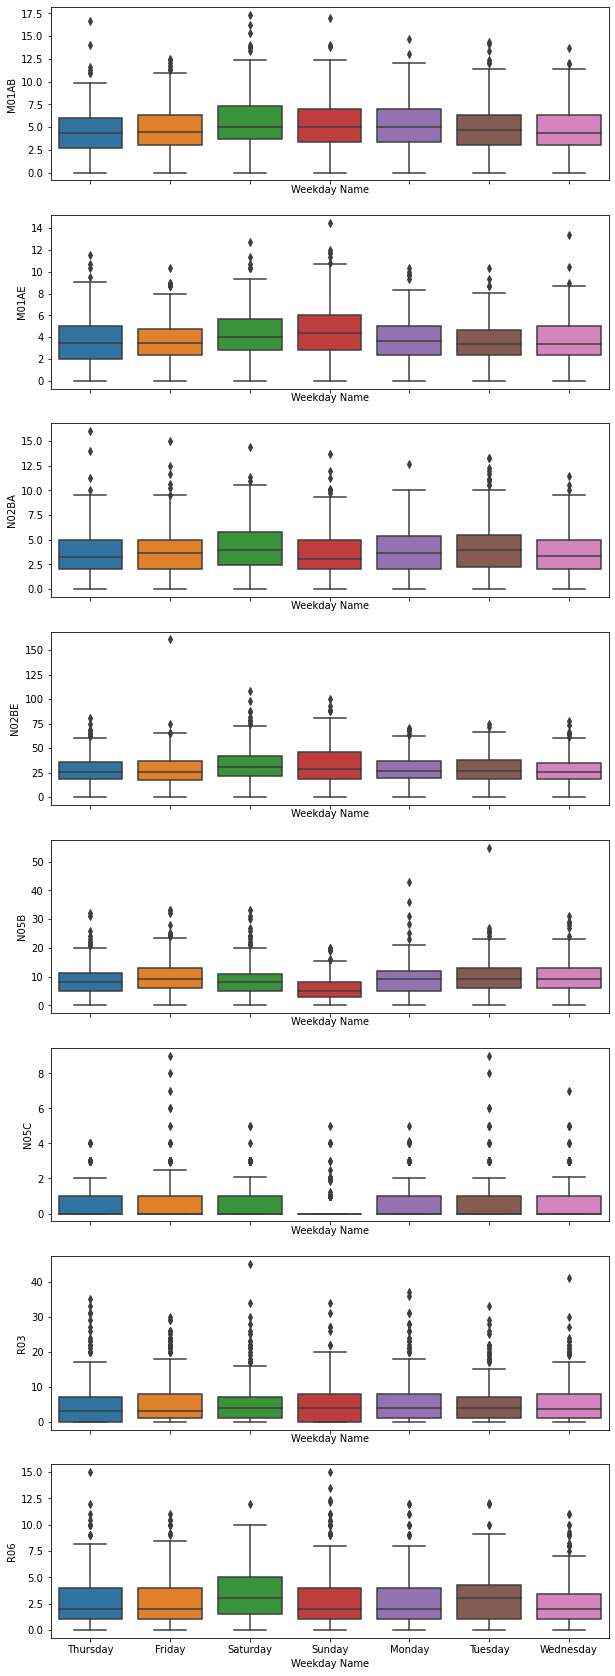

In [13]:
# similarly we can try checking weekly seasonality
# also here we can see if any particular day of the week has higher sales

fig, axes = plt.subplots(8, 1, figsize = (10, 30), sharex = True)
for name, ax in zip(['M01AB','M01AE','N02BA','N02BE', 'N05B','N05C','R03','R06'], axes):
    sns.boxplot(data = data_d, x = 'Weekday Name', y = name, ax = ax)

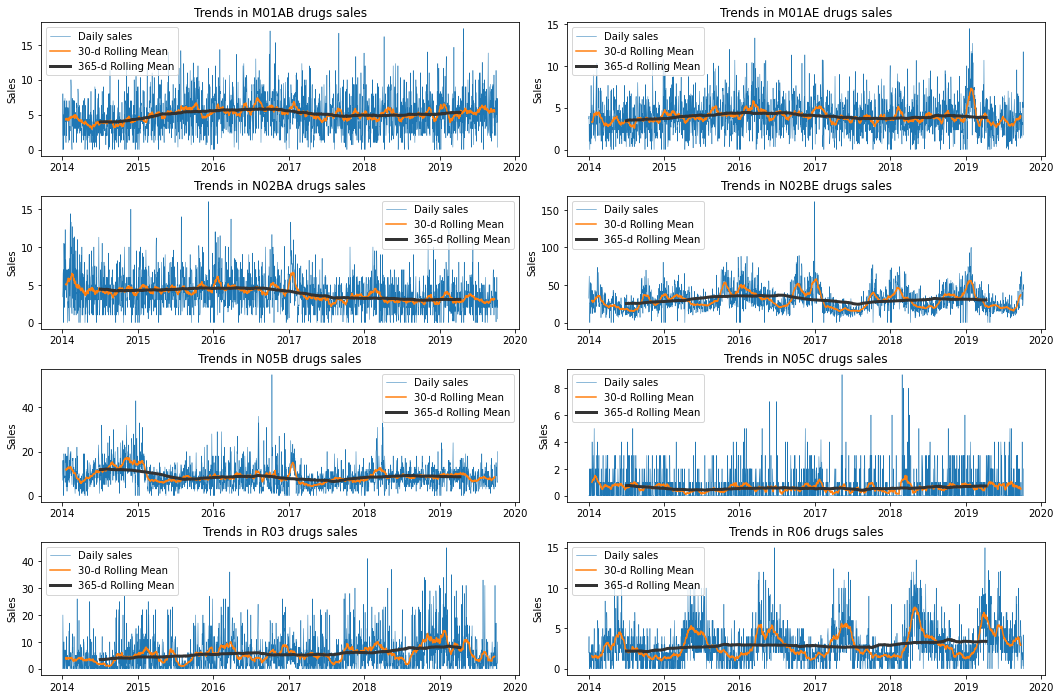

In [14]:
cols_plot = ['M01AB','M01AE','N02BA','N02BE', 'N05B','N05C','R03','R06']
data_365d = data_d[cols_plot].rolling(365, center = True).mean()
data_30d = data_d[cols_plot].rolling(30, center = True).mean()

subplotindex=0
numrows=4
numcols=2
fig, ax = plt.subplots(numrows, numcols, figsize=(18, 12))
plt.subplots_adjust(wspace=0.1, hspace=0.3)

for x in cols_plot:
    rowindex=math.floor(subplotindex/numcols)
    colindex=subplotindex-(rowindex*numcols)
    ax[rowindex,colindex].plot(data_d.loc[:,x], linewidth=0.5, label='Daily sales')
    ax[rowindex,colindex].plot(data_30d.loc[:,x], label='30-d Rolling Mean')
    ax[rowindex,colindex].plot(data_365d.loc[:,x], color='0.2', linewidth=3, label='365-d Rolling Mean')
    ax[rowindex,colindex].set_ylabel('Sales')
    ax[rowindex,colindex].legend()
    ax[rowindex,colindex].set_title('Trends in '+x+' drugs sales');   
    subplotindex=subplotindex+1
plt.show()

In [15]:
# above we have used rolling window operations to further observe the seasonality patterns in the data
# we used 365d, 30d rolling means of the sales data
# here we can very well observe the seasonality in N02BE, R03 and R06
# talking about trend, sales of N05C has been consistent throughout, while that of M01AB, R03, R06 has increased with time.

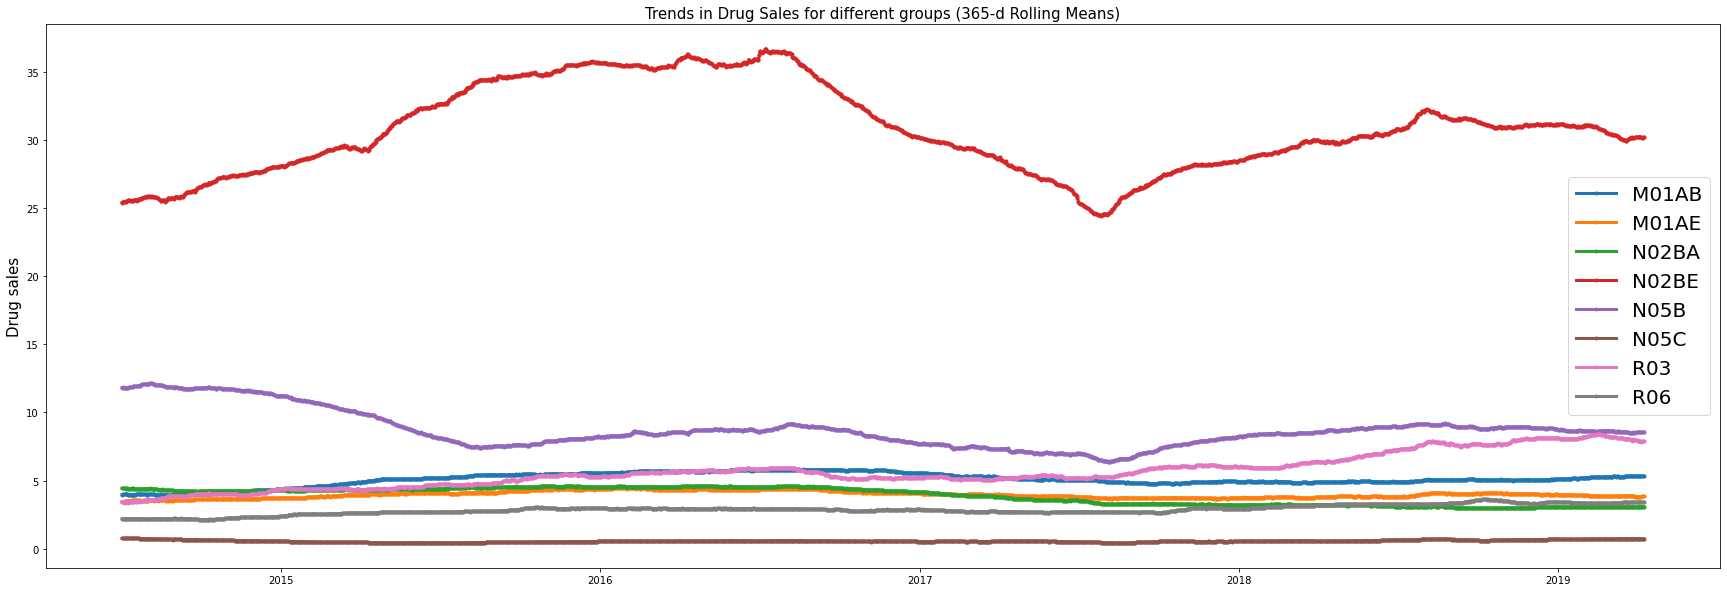

In [16]:
# now we compare trends in drug sales for all categories

fig, ax = plt.subplots(figsize=(30, 10))
for nm in cols_plot:
    ax.plot(data_365d[nm], label=nm, marker='.', linestyle='-', linewidth=3)
    ax.legend(prop={'size': 20})
    ax.set_ylabel('Drug sales', fontsize=15)
    ax.set_title('Trends in Drug Sales for different groups (365-d Rolling Means)', fontsize=15);

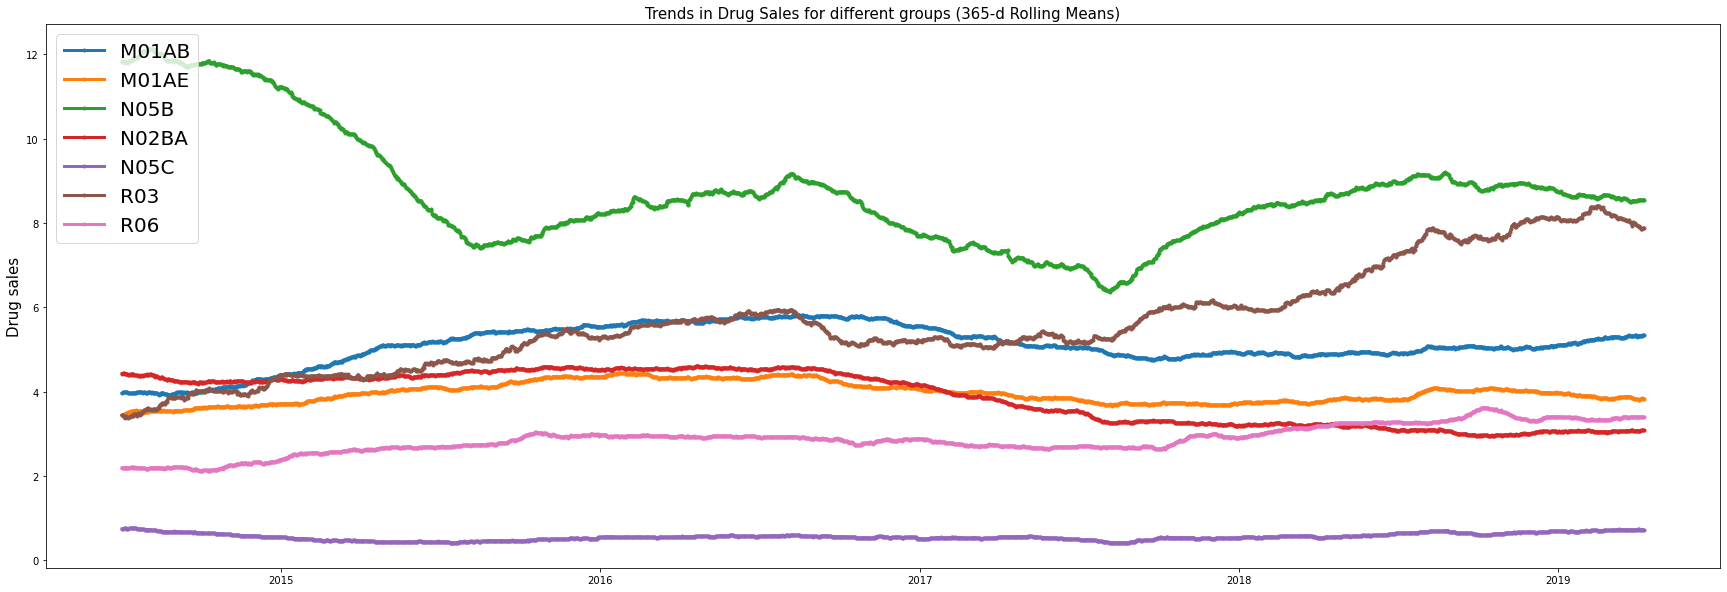

In [17]:
# same plot as above, excluding N02BE

fig, ax = plt.subplots(figsize=(30, 10))
for nm in ['M01AB','M01AE','N05B','N02BA','N05C','R03','R06']:
    ax.plot(data_365d[nm], label=nm, marker='.', linestyle='-', linewidth=3)
    ax.legend(prop={'size': 20})
    ax.set_ylabel('Drug sales', fontsize=15)
    ax.set_title('Trends in Drug Sales for different groups (365-d Rolling Means)', fontsize=15);

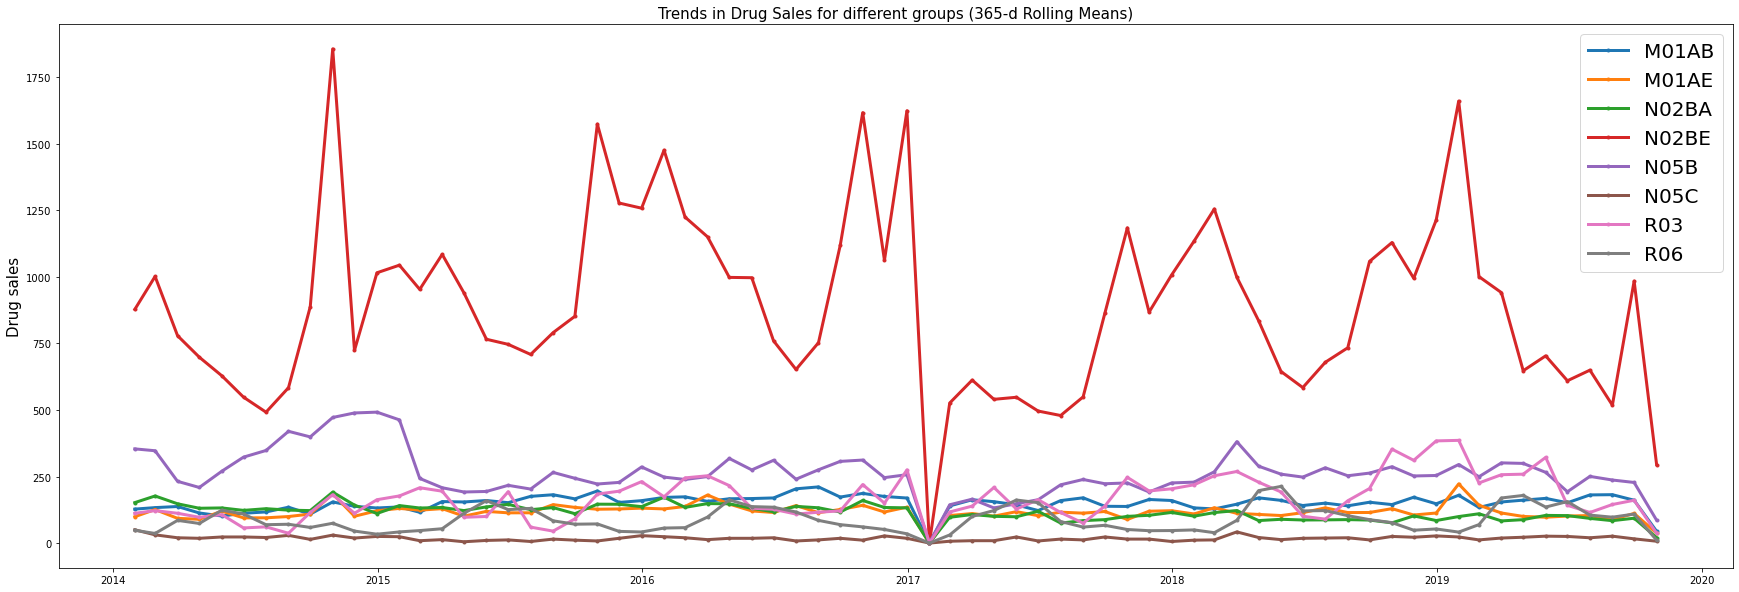

In [18]:
fig, ax = plt.subplots(figsize=(30, 10))
for nm in cols_plot:
    ax.plot(data_m[nm], label=nm, marker='.', linestyle='-', linewidth=3)
    ax.legend(prop={'size': 20})
    ax.set_ylabel('Drug sales', fontsize=15)
    ax.set_title('Trends in Drug Sales for different groups (365-d Rolling Means)', fontsize=15);

In [19]:
# wonder what happened in 2017 first month. lets check

data_m[data_m.index.year==2017]

M01AB    M01AE   N02BA     N02BE   N05B  N05C    R03     R06
datum                                                                    
2017-01-31    0.00    0.000    0.00     0.000    1.0   0.0    0.0    0.00
2017-02-28  139.69  103.517   97.00   526.350  144.0   7.0  117.0   30.60
2017-03-31  162.85  111.055  107.35   612.500  165.0   9.0  139.0  100.10
2017-04-30  155.61  101.215  100.50   540.200  132.0   9.0  209.0  122.40
2017-05-31  143.66  118.125   98.95   547.940  148.0  23.0  128.0  161.81
2017-06-30  122.33  103.006  119.60   496.100  163.0   8.0  163.0  151.90
2017-07-31  159.67  116.206   75.20   479.350  219.0  15.0  115.0   81.10
2017-08-31  170.15  112.470   84.40   549.300  239.0  12.0   75.0   60.10
2017-09-30  138.33  118.711   88.15   863.750  223.0  23.0  139.0   66.90
2017-10-31  137.64   88.737  100.40  1184.350  226.0  15.0  247.0   51.00
2017-11-30  163.85  119.780  104.45   867.899  192.0  15.0  196.0   46.60
2017-12-31  160.01  121.663  115.15  1007.180  226.0   6.0  204.0   47.10

In [20]:
# There seems something wrong with the data since the total month sales could not be 0. 
# Also if we check daily data, we do have sales for the first month of 2017.
# Hence we would be replacing those values with average of preceeding and succeeding dates.

data_m[data_m.index=='2017-01-31'] = data_m[(data_m.index=='2016-12-31') | (data_m.index=='2017-02-28')].mean().values

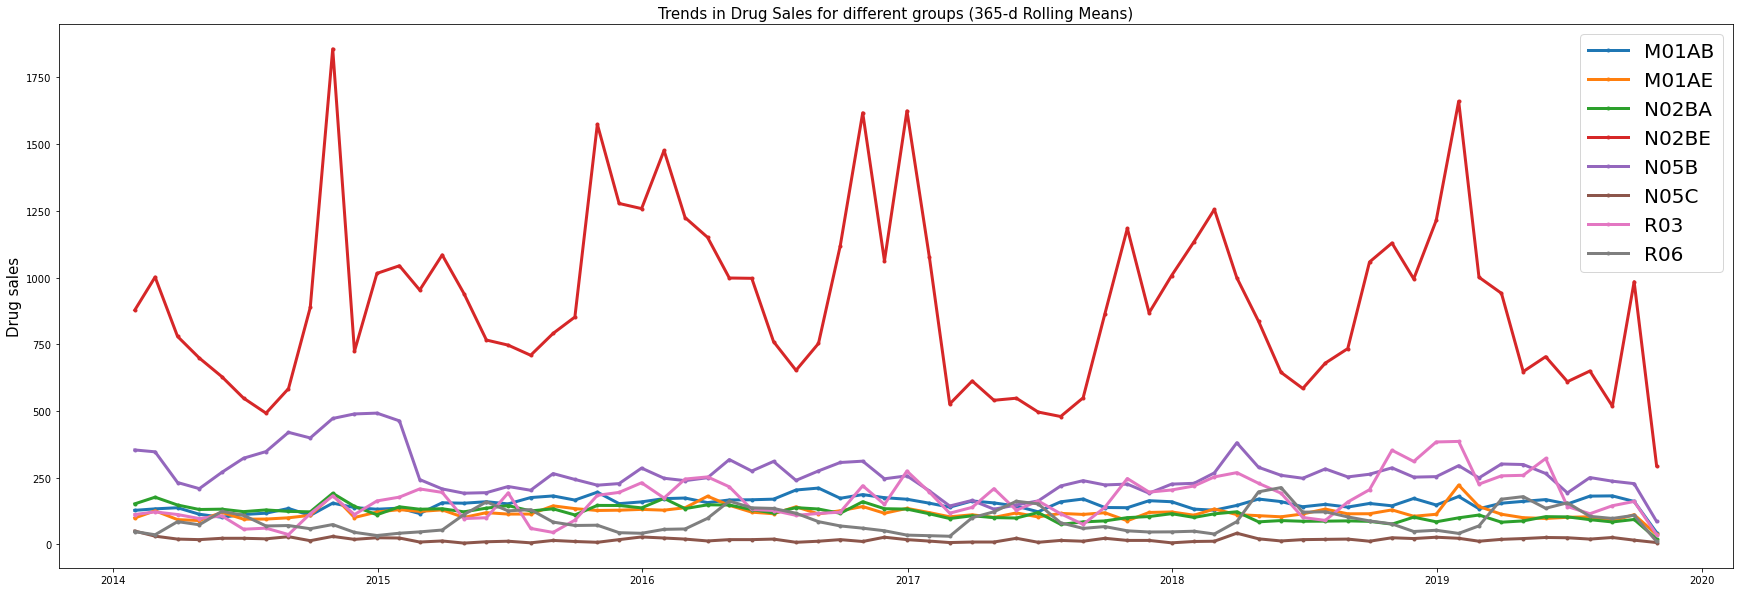

In [21]:
fig, ax = plt.subplots(figsize=(30, 10))
for nm in cols_plot:
    ax.plot(data_m[nm], label=nm, marker='.', linestyle='-', linewidth=3)
    ax.legend(prop={'size': 20})
    ax.set_ylabel('Drug sales', fontsize=15)
    ax.set_title('Trends in Drug Sales for different groups (365-d Rolling Means)', fontsize=15);

### Seasonal Decomposition

In [22]:
# Time series decomposition involves thinking of a series as a combination of level, trend, seasonality, and noise components.
# Every time series is supposed to have four components, namely level, trend, seasonal and residual.
# Trend and seasonal may be optional, but level and residual are always there as components of a series. 
# Hence below we decompose our time series using seasonal_decompose()

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose

def seasonal_decomposition(data, freq):
    result = seasonal_decompose(data.dropna(), freq=freq, filt = None)
    plt.rcParams["figure.figsize"] = (8,8)
    result.plot()
    plt.show()

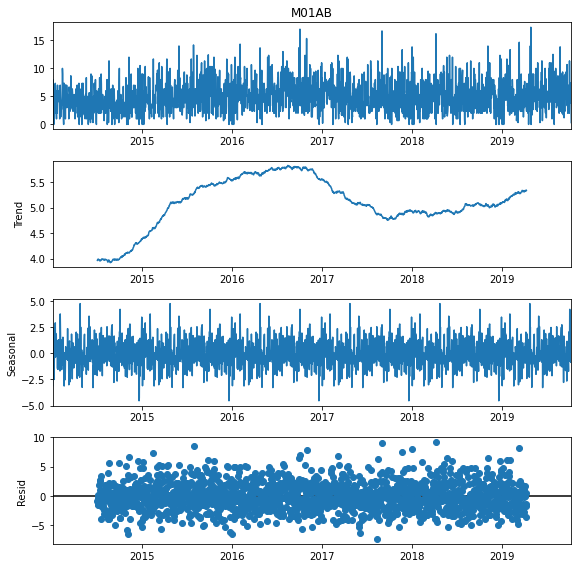

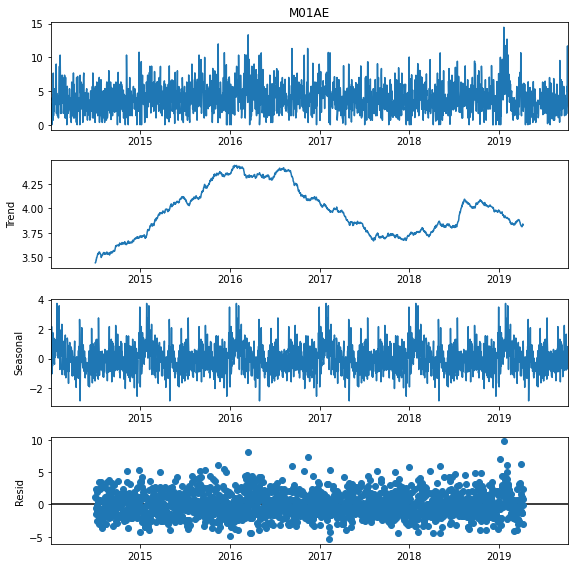

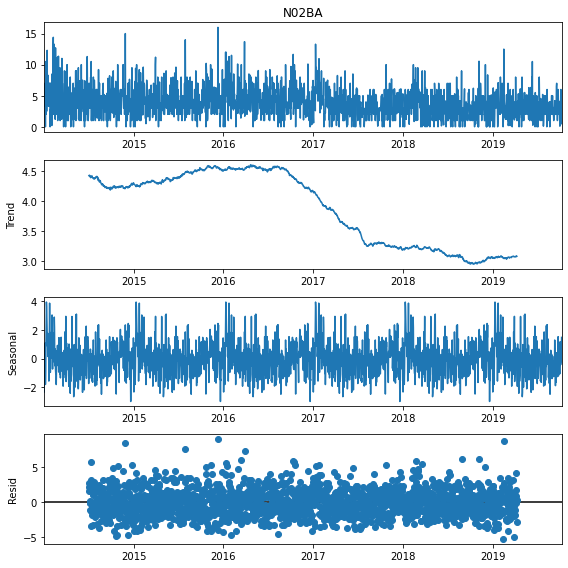

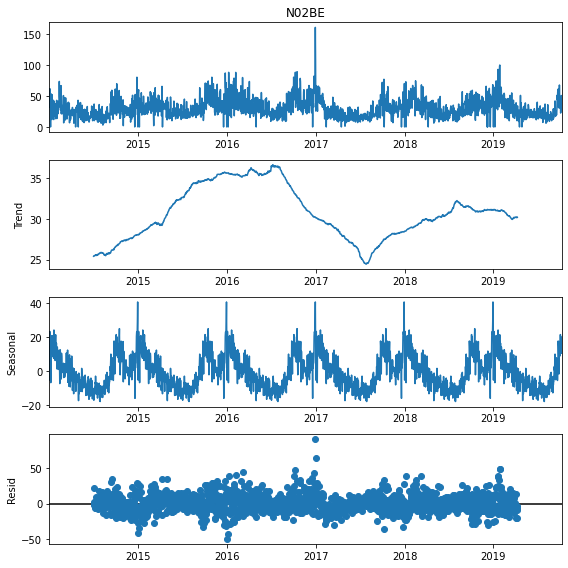

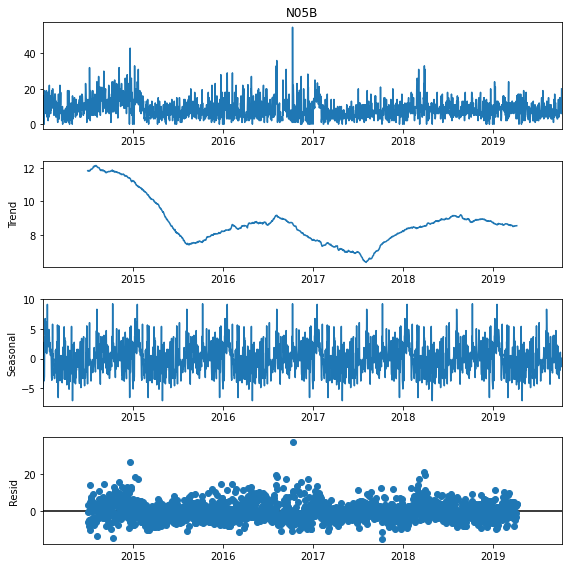

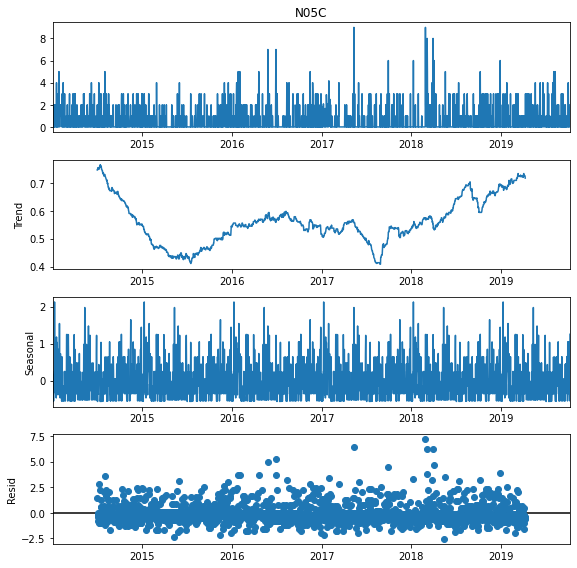

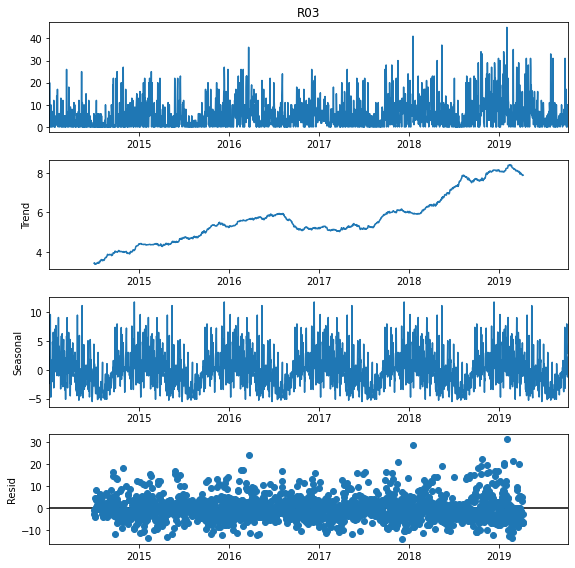

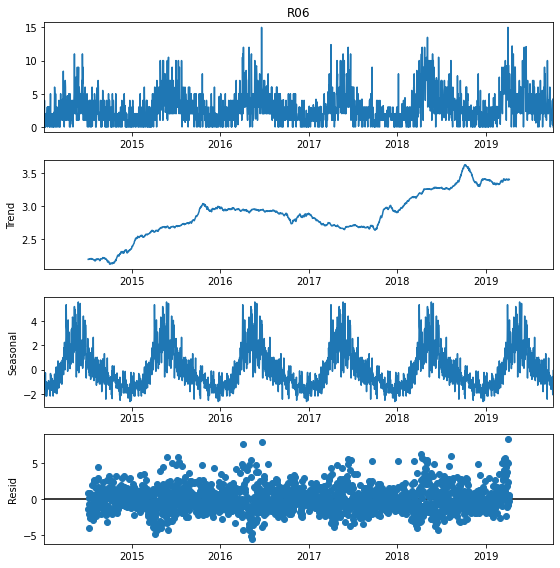

In [24]:
for col in cols_plot:
    seasonal_decomposition(data_d[col], freq=365)

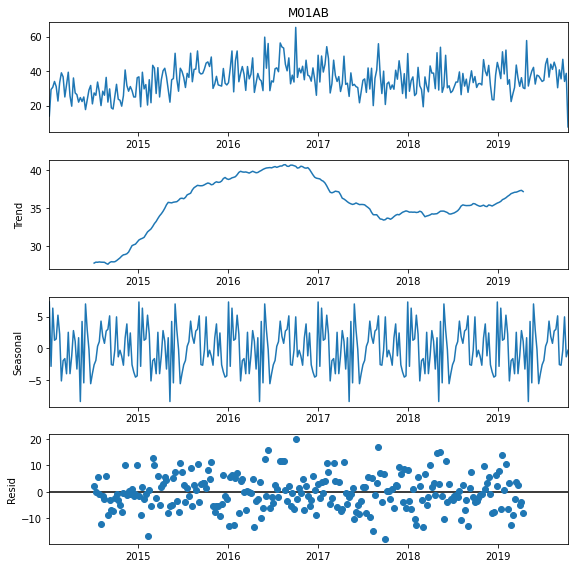

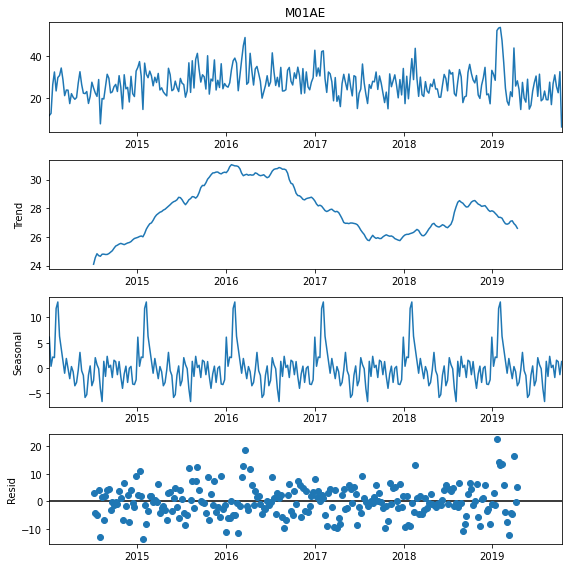

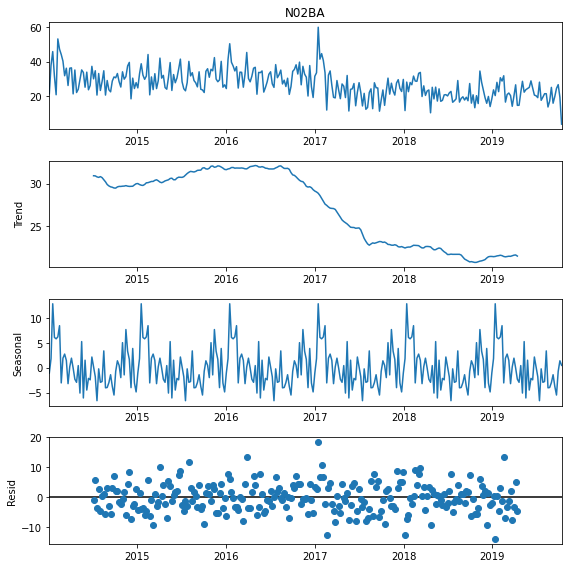

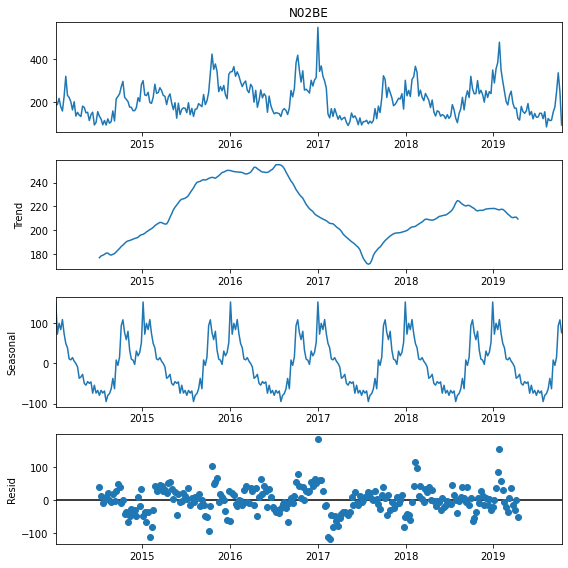

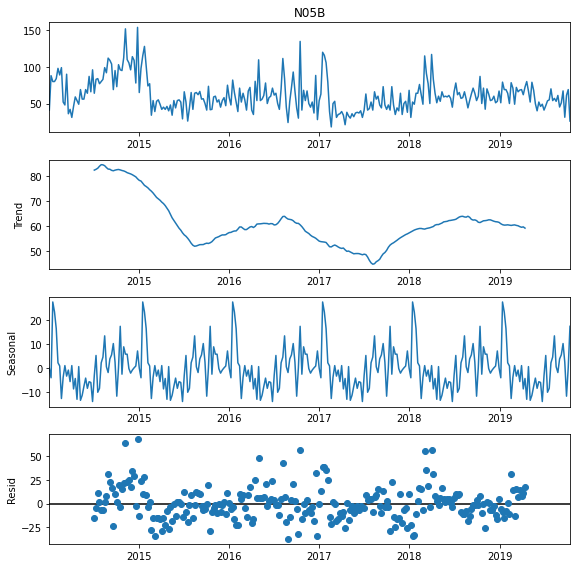

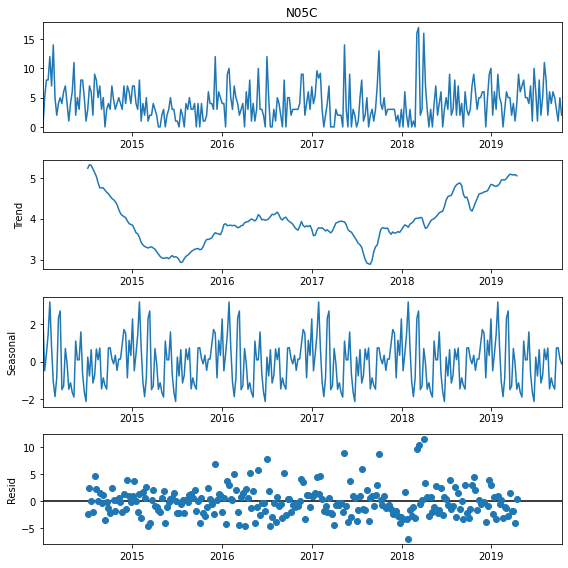

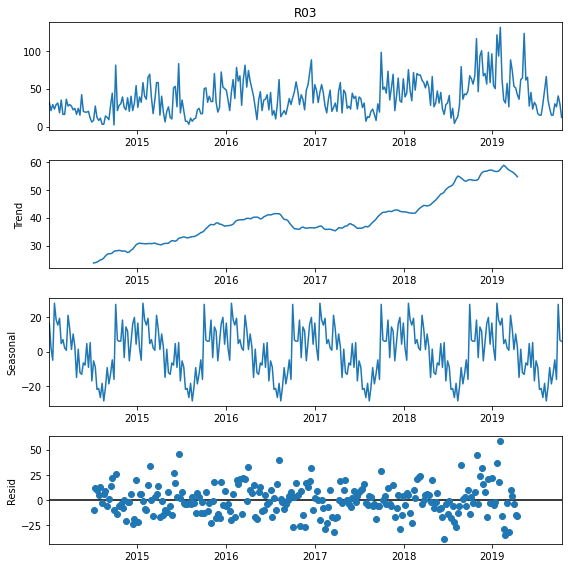

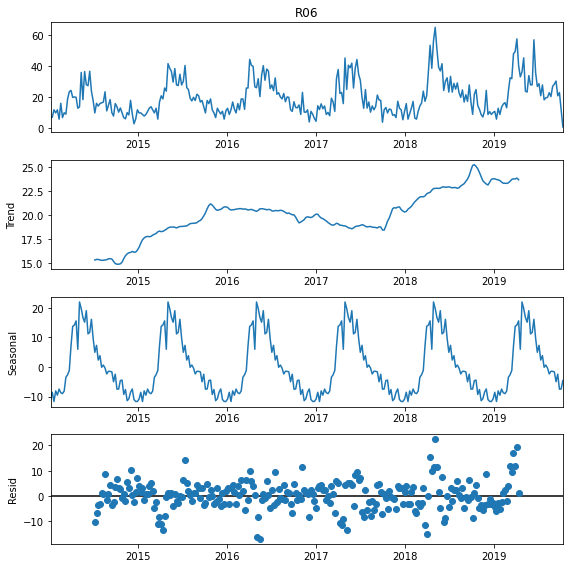

In [25]:
for col in cols_plot:
    seasonal_decomposition(data_w[col], freq=52)

In [26]:
# The first block above gives the observed data plot
# Trend shows that the sales is first increasing, then decresing and then increasing
# Yes, we do have seasonality in N02BE category drug type sales
# Resid gives the predictibility. More the resid more the noise hence lesser the predictibility

### Checking for Anomalies

In [27]:
# trend + seasonality comparison with observed weekly data

def anomalies_detect(data, freq):
    result = seasonal_decompose(data.dropna(), freq=freq, filt = None)
    estimated = result.trend + result.seasonal
    plt.figure(figsize=(12,4))
    plt.plot(data, label=('Observed'))
    plt.plot(estimated, label=('Trend+Seasonality'))
    plt.legend()
    plt.title('Observed vs Trend+Seasonality for '+col)
    plt.show()
    
    resid = result.resid
    resid_mu = resid.mean()
    resid_std = resid.std()
    lower = resid_mu - 3*resid_std
    upper = resid_mu + 3*resid_std
    plt.figure(figsize=(10,4))
    plt.plot(resid)
    plt.fill_between([datetime(2014,1,1), datetime(2019,10,8)], lower, upper, color='g', alpha=0.25, linestyle='--',
                     linewidth=2)
    plt.title('Area of Significance')
    plt.show()
    
    anomalies = data[15:-14][(resid < lower) | (resid > upper)]
    plt.figure(figsize=(10,4))
    plt.plot(data)
    plt.scatter(anomalies.index, anomalies.values, color='r', marker='+')
    plt.title('Anomalies')
    plt.show()
    
    print(anomalies)
    print('*'*100)

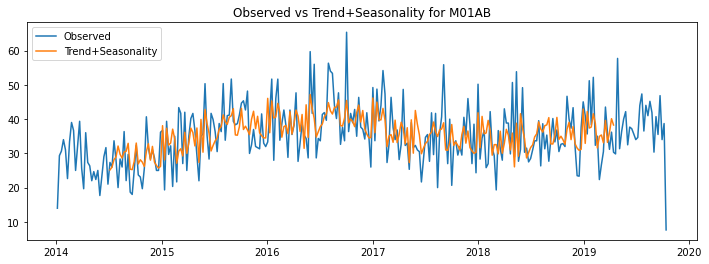

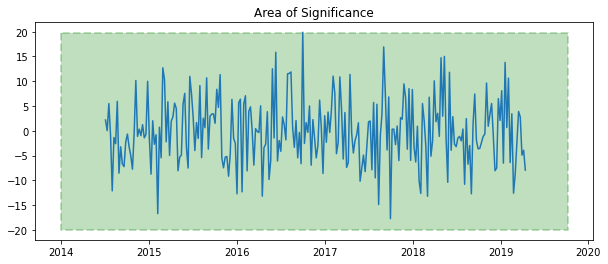

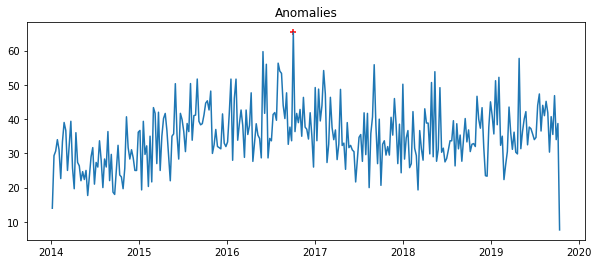

datum
2016-10-02    65.33
Name: M01AB, dtype: float64
****************************************************************************************************


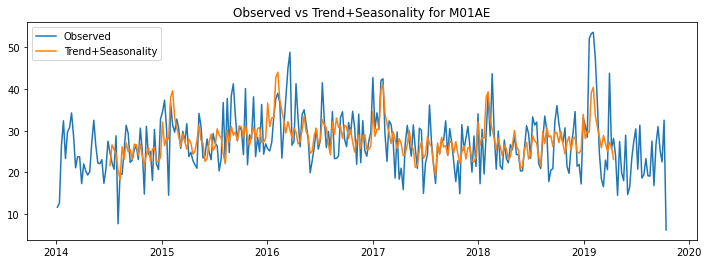

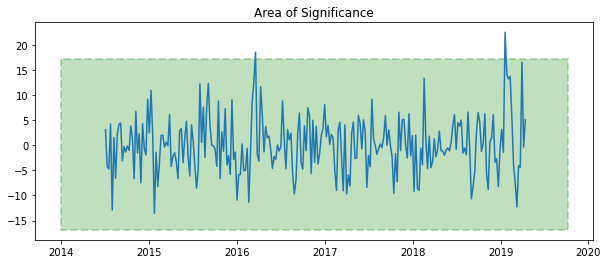

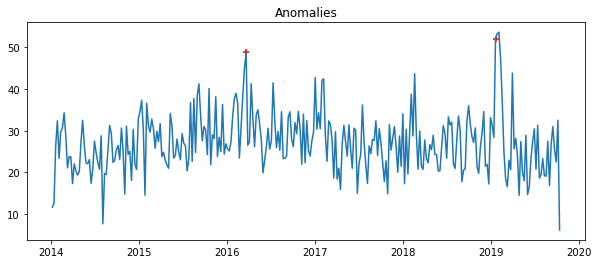

datum
2016-03-20    48.752
2019-01-20    52.069
Name: M01AE, dtype: float64
****************************************************************************************************


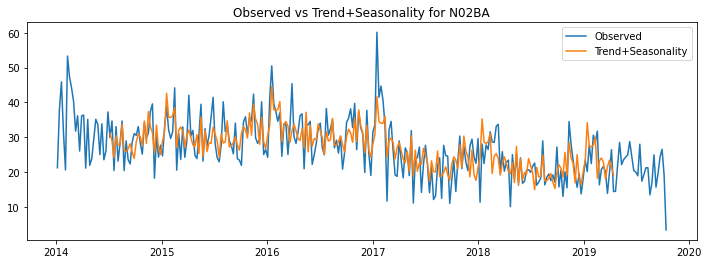

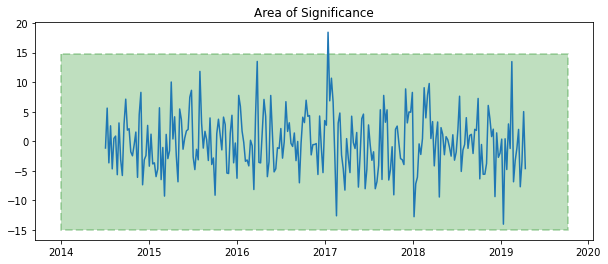

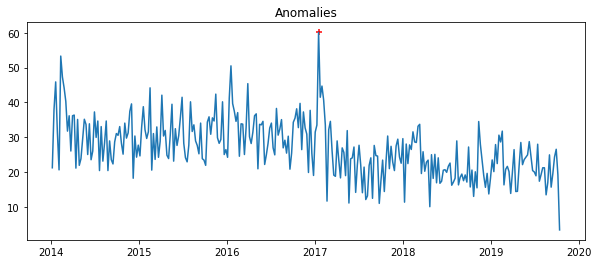

datum
2017-01-15    60.125
Name: N02BA, dtype: float64
****************************************************************************************************


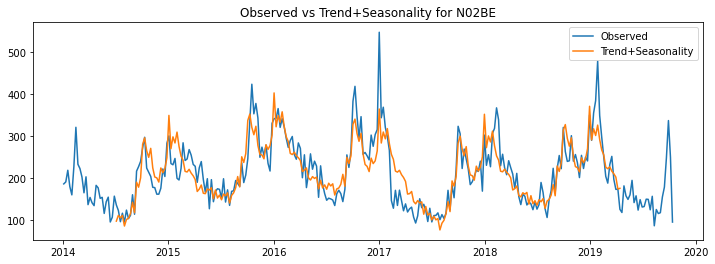

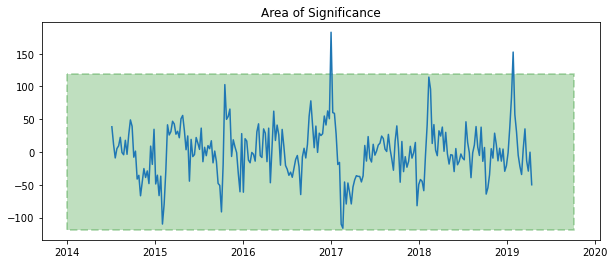

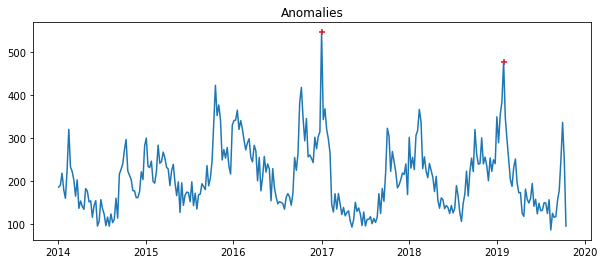

datum
2017-01-01    546.899
2019-01-27    478.300
Name: N02BE, dtype: float64
****************************************************************************************************


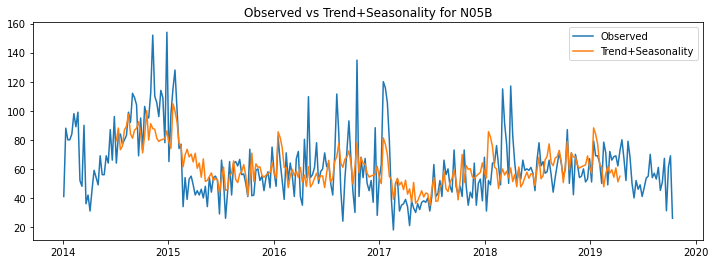

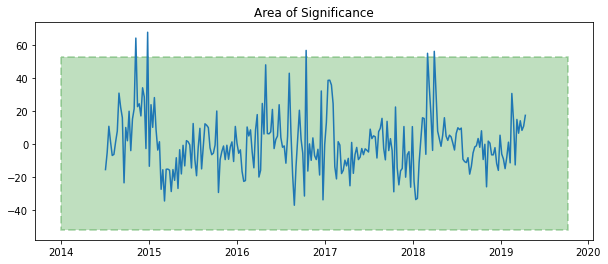

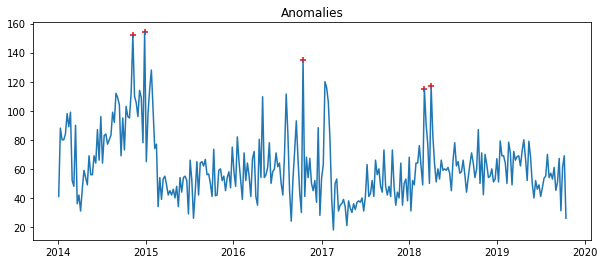

datum
2014-11-09    152.000000
2014-12-28    154.000000
2016-10-16    134.833333
2018-03-04    115.000000
2018-04-01    117.000000
Name: N05B, dtype: float64
****************************************************************************************************


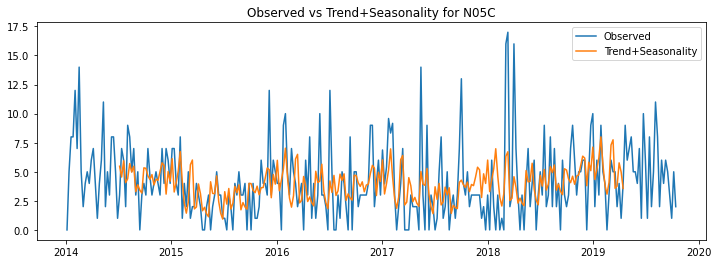

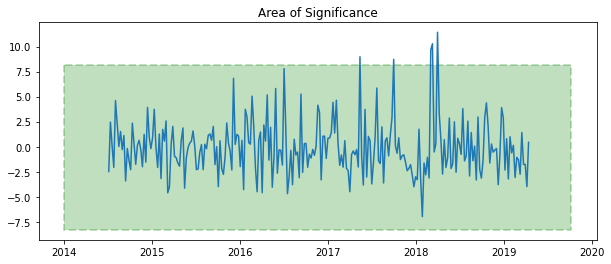

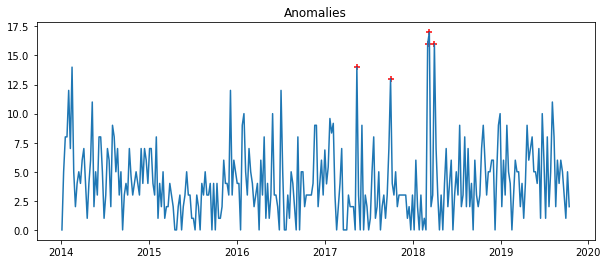

datum
2017-05-14    14.0
2017-10-01    13.0
2018-03-04    16.0
2018-03-11    17.0
2018-04-01    16.0
Name: N05C, dtype: float64
****************************************************************************************************


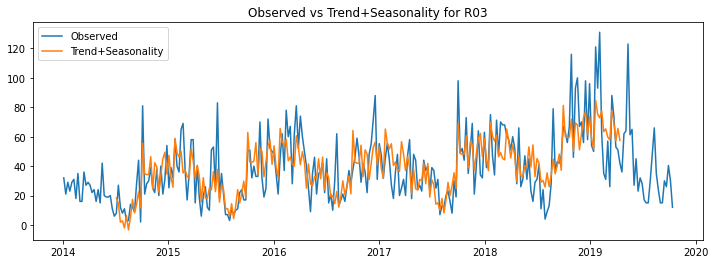

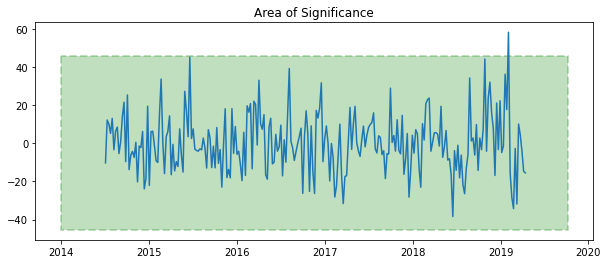

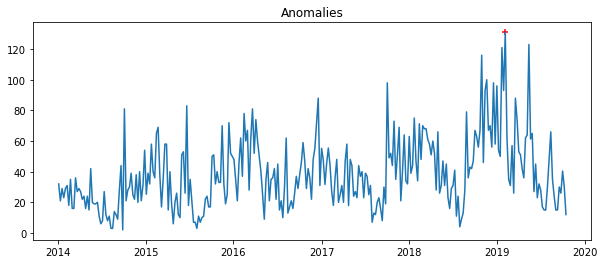

datum
2019-02-03    131.0
Name: R03, dtype: float64
****************************************************************************************************


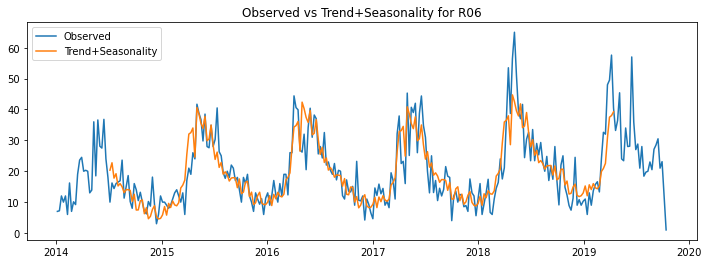

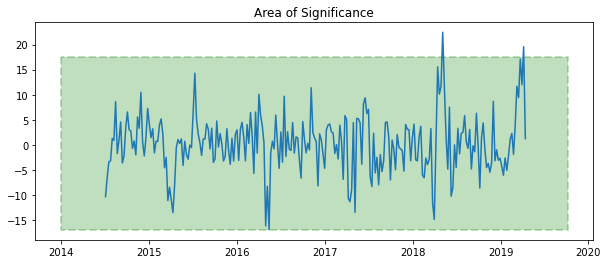

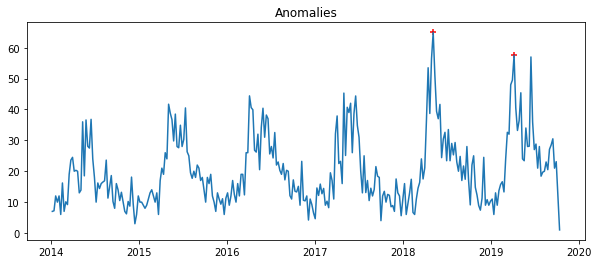

datum
2018-05-06    65.0
2019-04-07    57.6
Name: R06, dtype: float64
****************************************************************************************************


In [28]:
from datetime import datetime

for col in data_w.columns.to_list():
    anomalies_detect(data_w[col], freq=52)

## Removing Seasonality

### Using the difference method

In [29]:
# subtract the average sales from the daily sales of the same calendar month in the previous year, 
# rather than the same day of the previos year

def remove_seasonality(data, months_in_year=12, days_in_year=365):
    X = data
    result = seasonal_decompose(X.dropna(), freq=365, filt = None)
    plt.figure(figsize=(12,5))
    plt.title('Actual Series')
    plt.plot(result.seasonal)
    plt.show()
    
    diff = list()
    resample = X.resample('M')
    monthly_mean = resample.mean()
    
    for i in range(days_in_year, len(X)):
        value = X[i] - monthly_mean[int((i-days_in_year)/30)]
        diff.append(value)
        
    df = pd.DataFrame()
    df['diff'] = diff
    df.index = data_d.index[days_in_year:]
    result = seasonal_decompose(df['diff'].dropna(), freq=365, filt = None)
    plt.figure(figsize=(12,5))
    plt.plot(result.seasonal)
    plt.title('Differenced series')
    plt.show()

For N02BA


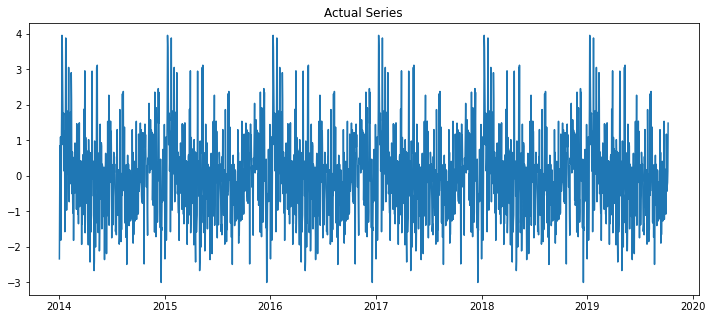

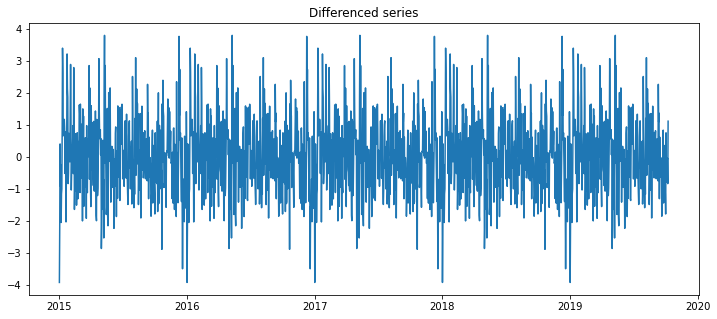

For N02BE


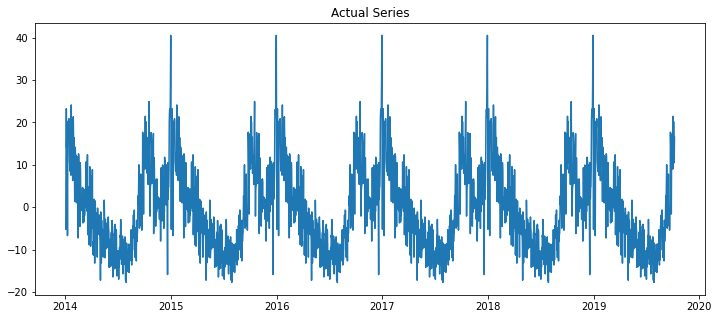

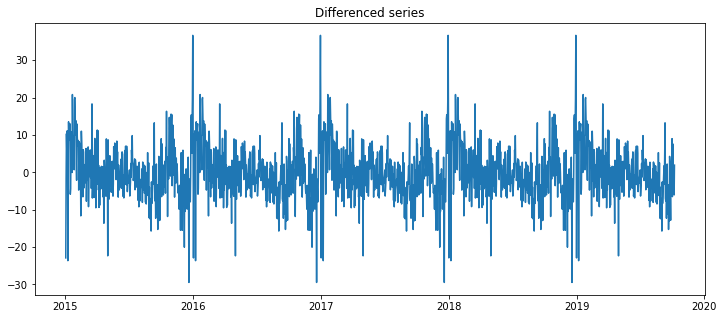

For R03


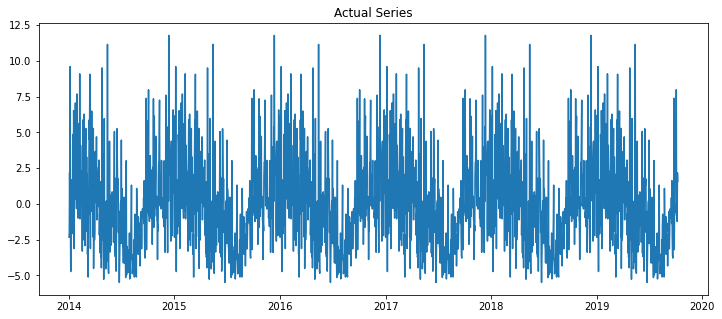

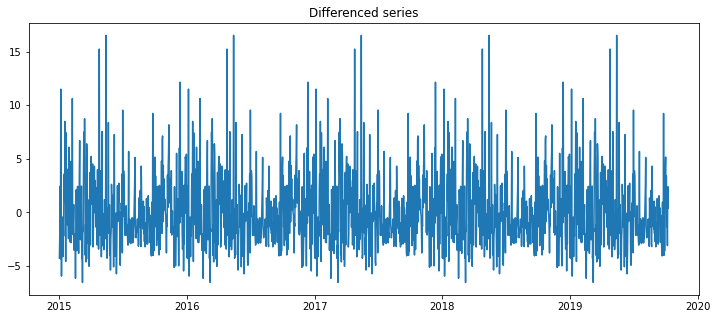

For R06


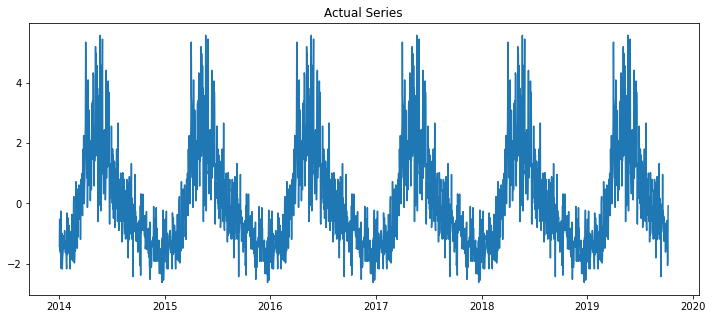

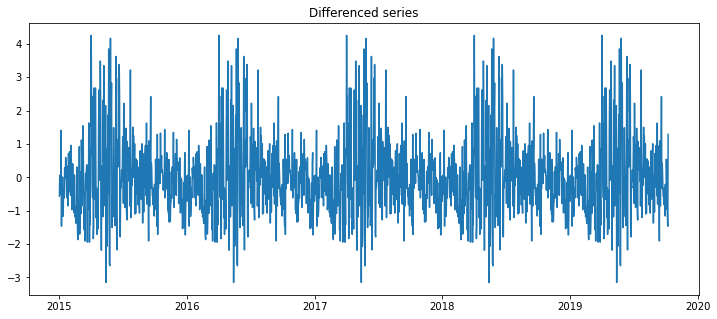

In [30]:
for col in ['N02BA', 'N02BE', 'R03', 'R06']:
    print('For '+col)
    remove_seasonality(data_d[col])

In [31]:
# we were successful in removing a part of seasonality from the data, though not fully
# We removed the yearly seasonality while there may be other components of seasonality in our series
# Apart from R06 and N02BE we did well in removing seasonality
# Let's try to remove seasonality for them using another method

### Deseasonalising using model fitting

In [32]:
from numpy import polyfit

def remove_seasonality_using_fit(data, degree):
    
    X=data
    result = seasonal_decompose(X.dropna(), freq=365, filt = None)
    plt.figure(figsize=(12,5))
    plt.title('Actual Series')
    plt.plot(result.seasonal)
    plt.show()
    
    series = data
    # fit polynomial: x^2*b1 + x*b2 + ... + bn
    X = [i%365 for i in range(0, len(series))]
    y = series.values
    coef = polyfit(X, y, degree)
    curve = list()
    
    for i in range(len(X)):
        value = coef[-1]
        for d in range(degree):
            value+=X[i]**(degree-d)*coef[d]
        curve.append(value)
    values = series.values
    diff = list()
    for i in range(len(values)):
        value = values[i]-curve[i]
        diff.append(value)
        
    df = pd.DataFrame()
    df['diff'] = diff
    df.index = data_d.index
    result = seasonal_decompose(df['diff'].dropna(), freq=365, filt = None)
    plt.figure(figsize=(12,5))
    plt.plot(result.seasonal)
    plt.title('Differenced series')
    plt.show()     

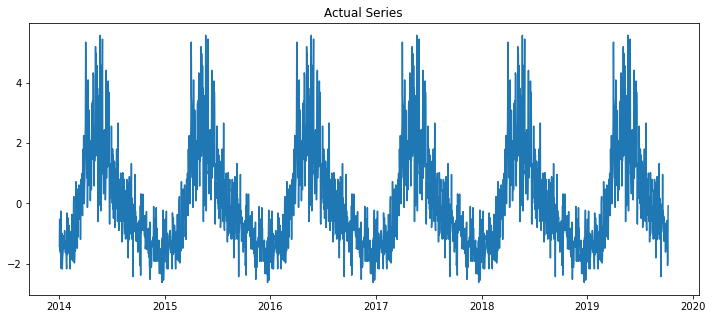

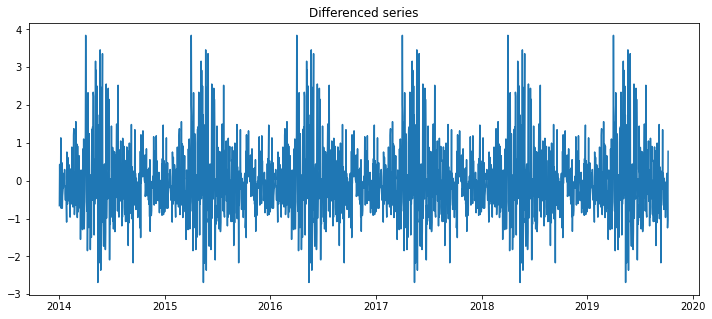

In [33]:
remove_seasonality_using_fit(data_d['R06'], degree=15)

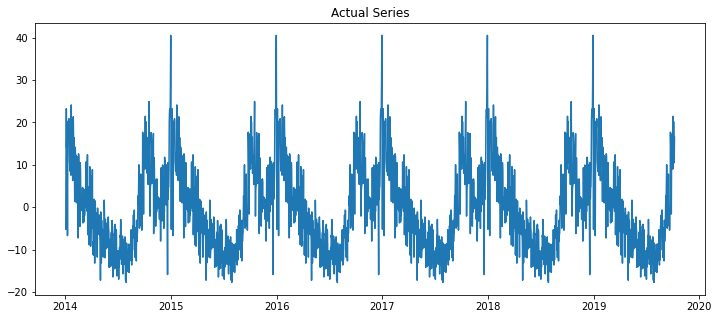

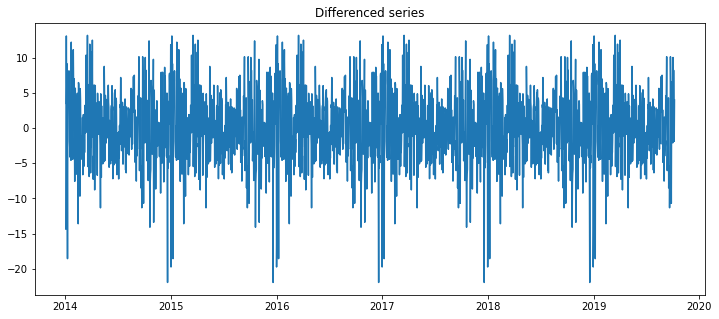

In [34]:
remove_seasonality_using_fit(data_d['N02BE'], degree=15)

# Stationarity

## Adfuller Test

#### For daily data

In [35]:
from statsmodels.tsa.stattools import adfuller

for x in cols_plot:
    dftest = adfuller(data_d[x], regression='ct', autolag='AIC')
    print("\n\nADF test for "+x)
    print("-----------------------------")
    print("Test statistic = {:.3f}".format(dftest[0]))
    print("P-value = {:.3f}".format(dftest[1]))
    print("Critical values :")
    for k, v in dftest[4].items():
        print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else ""
                                                                                , 100-int(k[:-1])))



ADF test for M01AB
-----------------------------
Test statistic = -8.669
P-value = 0.000
Critical values :
	1%: -3.9631060717799924 - The data is  stationary with 99% confidence
	5%: -3.41259173685078 - The data is  stationary with 95% confidence
	10%: -3.1282874376905356 - The data is  stationary with 90% confidence


ADF test for M01AE
-----------------------------
Test statistic = -7.471
P-value = 0.000
Critical values :
	1%: -3.9631206583322434 - The data is  stationary with 99% confidence
	5%: -3.4125988034261017 - The data is  stationary with 95% confidence
	10%: -3.128291597193074 - The data is  stationary with 90% confidence


ADF test for N02BA
-----------------------------
Test statistic = -7.829
P-value = 0.000
Critical values :
	1%: -3.9631123111656277 - The data is  stationary with 99% confidence
	5%: -3.412594759575526 - The data is  stationary with 95% confidence
	10%: -3.1282892169169547 - The data is  stationary with 90% confidence


ADF test for N02BE
--------------

#### For weekly data

In [36]:
for x in cols_plot:
    dftest = adfuller(data_w[x], regression='ct', autolag='AIC')
    print("\n\nADF test for "+x)
    print("-----------------------------")
    print("Test statistic = {:.3f}".format(dftest[0]))
    print("P-value = {:.3f}".format(dftest[1]))
    print("Critical values :")
    for k, v in dftest[4].items():
        print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else ""
                                                                                , 100-int(k[:-1])))



ADF test for M01AB
-----------------------------
Test statistic = -3.700
P-value = 0.022
Critical values :
	1%: -3.9897903649837616 - The data is not stationary with 99% confidence
	5%: -3.425478311521626 - The data is  stationary with 95% confidence
	10%: -3.1358607194990724 - The data is  stationary with 90% confidence


ADF test for M01AE
-----------------------------
Test statistic = -8.717
P-value = 0.000
Critical values :
	1%: -3.98926783537037 - The data is  stationary with 99% confidence
	5%: -3.425226747185185 - The data is  stationary with 95% confidence
	10%: -3.1357131066666666 - The data is  stationary with 90% confidence


ADF test for N02BA
-----------------------------
Test statistic = -2.670
P-value = 0.249
Critical values :
	1%: -3.990441532957606 - The data is not stationary with 99% confidence
	5%: -3.425791763669738 - The data is not stationary with 95% confidence
	10%: -3.1360446341572343 - The data is not stationary with 90% confidence


ADF test for N02BE
----

#### For monthly data

In [37]:
for x in cols_plot:
    dftest = adfuller(data_m[x], regression='ct', autolag='AIC')
    print("\n\nADF test for "+x)
    print("-----------------------------")
    print("Test statistic = {:.3f}".format(dftest[0]))
    print("P-value = {:.3f}".format(dftest[1]))
    print("Critical values :")
    for k, v in dftest[4].items():
        print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else ""
                                                                                , 100-int(k[:-1])))



ADF test for M01AB
-----------------------------
Test statistic = -3.356
P-value = 0.058
Critical values :
	1%: -4.096353737736257 - The data is not stationary with 99% confidence
	5%: -3.476155027137765 - The data is not stationary with 95% confidence
	10%: -3.165414996392793 - The data is  stationary with 90% confidence


ADF test for M01AE
-----------------------------
Test statistic = -5.941
P-value = 0.000
Critical values :
	1%: -4.096353737736257 - The data is  stationary with 99% confidence
	5%: -3.476155027137765 - The data is  stationary with 95% confidence
	10%: -3.165414996392793 - The data is  stationary with 90% confidence


ADF test for N02BA
-----------------------------
Test statistic = -4.172
P-value = 0.005
Critical values :
	1%: -4.098478405633014 - The data is  stationary with 99% confidence
	5%: -3.4771531627824137 - The data is  stationary with 95% confidence
	10%: -3.1659935375534296 - The data is  stationary with 90% confidence


ADF test for N02BE
-----------

## KPSS Test

#### For weekly data

In [38]:
from statsmodels.tsa.stattools import kpss
warnings.filterwarnings("ignore")

for x in cols_plot:
    print(" > Is "+x+" data stationary ?")
    dftest = kpss(np.log(data_w[x]), 'ct')
    print("Test statistic = {:.3f}".format(dftest[0]))
    print("P-value = {:.3f}".format(dftest[1]))
    print("Critical values :")
    for k, v in dftest[3].items():
        print("\t{}: {}".format(k, v))

 > Is M01AB data stationary ?
Test statistic = 0.285
P-value = 0.010
Critical values :
	10%: 0.119
	5%: 0.146
	2.5%: 0.176
	1%: 0.216
 > Is M01AE data stationary ?
Test statistic = 0.242
P-value = 0.010
Critical values :
	10%: 0.119
	5%: 0.146
	2.5%: 0.176
	1%: 0.216
 > Is N02BA data stationary ?
Test statistic = 0.147
P-value = 0.049
Critical values :
	10%: 0.119
	5%: 0.146
	2.5%: 0.176
	1%: 0.216
 > Is N02BE data stationary ?
Test statistic = 0.076
P-value = 0.100
Critical values :
	10%: 0.119
	5%: 0.146
	2.5%: 0.176
	1%: 0.216
 > Is N05B data stationary ?
Test statistic = 0.143
P-value = 0.056
Critical values :
	10%: 0.119
	5%: 0.146
	2.5%: 0.176
	1%: 0.216
 > Is N05C data stationary ?
Test statistic = nan
P-value = nan
Critical values :
	10%: 0.119
	5%: 0.146
	2.5%: 0.176
	1%: 0.216
 > Is R03 data stationary ?
Test statistic = 0.046
P-value = 0.100
Critical values :
	10%: 0.119
	5%: 0.146
	2.5%: 0.176
	1%: 0.216
 > Is R06 data stationary ?
Test statistic = 0.027
P-value = 0.100
Cri

## Regularity Analysis

In [39]:
# For calculating regularity and predictability of time series, Approximate Entropy test was used. 
# For all series, entropy values were > 1 indicating low predictability, with highest values for M01AE, M01AB and N02BA.

#### For weekly data

In [40]:
def ApEn(U, m, r):
    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])
    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for x_j in x if _maxdist(x_i, x_j) <= r]) / (N - m + 1.0) for x_i in x]
        return (N - m + 1.0)**(-1) * sum(np.log(C))
    N = len(U)
    return abs(_phi(m+1) - _phi(m))

for x in cols_plot:
    print(x + ': ' + str(ApEn(data_w[x].values, m=2, r=0.2*np.std(data_w[x].values))))

M01AB: 1.141130089570642
M01AE: 1.166363924596575
N02BA: 1.1370638730125302
N02BE: 1.058024809082593
N05B: 1.074437415034502
N05C: 1.0361887401424648
R03: 1.1847216239035152
R06: 1.031759595747876


#### For daily data

In [41]:
def ApEn(U, m, r):
    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])
    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for x_j in x if _maxdist(x_i, x_j) <= r]) / (N - m + 1.0) for x_i in x]
        return (N - m + 1.0)**(-1) * sum(np.log(C))
    N = len(U)
    return abs(_phi(m+1) - _phi(m))

for x in cols_plot:
    print(x + ': ' + str(ApEn(data_d[x].values, m=2, r=0.2*np.std(data_w[x].values))))

M01AB: 1.1045164999704853
M01AE: 1.0554743266557978
N02BA: 1.0549084911827418
N02BE: 0.5726362708010837
N05B: 0.8014964951644681
N05C: 0.9801777653819346
R03: 0.8678922287216788
R06: 0.5773359396849842


#### For monthly data

In [42]:
def ApEn(U, m, r):
    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])
    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for x_j in x if _maxdist(x_i, x_j) <= r]) / (N - m + 1.0) for x_i in x]
        return (N - m + 1.0)**(-1) * sum(np.log(C))
    N = len(U)
    return abs(_phi(m+1) - _phi(m))

for x in cols_plot:
    print(x + ': ' + str(ApEn(data_m[x].values, m=2, r=0.2*np.std(data_w[x].values))))

M01AB: 0.08168800830562706
M01AE: 0.08585731370347904
N02BA: 0.10519323196407093
N02BE: 0.045674868453627226
N05B: 0.12945375998684927
N05C: 0.005492423203774521
R03: 0.025583645828700874
R06: 0.08585731370347904


## Autocorrelation analysis

Autocorrelation analysis illustrates the potential for time series data prediction. Autocorrelation plots graphically summarize the strength of a relationship with an observation in a time series with observations at prior time steps. Pearson coefficient is used to measure autocorrelation. Thus, the following analysis is relevant only for data with normal Gaussian distribution.

A plot of the autocorrelation of a time series by lag is called the AutoCorrelation Function (ACF). This plot is sometimes called a correlogram or an autocorrelation plot. Plot shows the lag value along the x-axis and the correlation on the y-axis between -1 and 1. Confidence intervals are drawn as a cone. By default, this is set to a 95% confidence interval, suggesting that correlation values outside of this code are very likely a correlation.

#### ACF for Monthly data

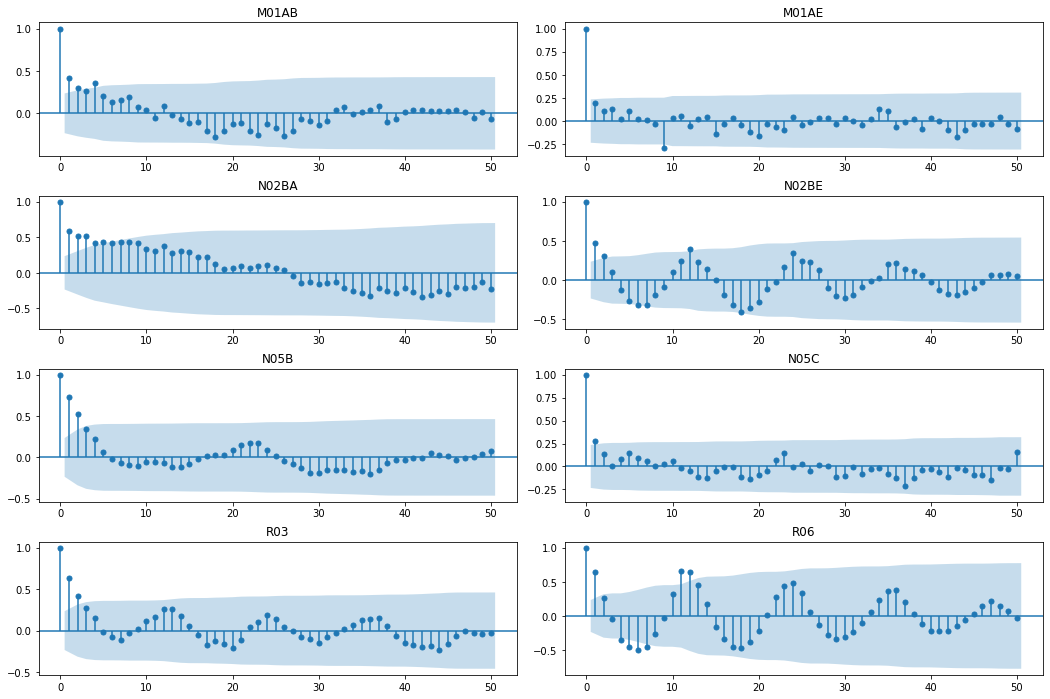

In [43]:
from statsmodels.graphics.tsaplots import plot_acf

subplotindex=0
numrows=4
numcols=2
fig, ax = plt.subplots(numrows, numcols, figsize=(18,12))
plt.subplots_adjust(wspace=0.1, hspace=0.3)
with plt.rc_context():
    plt.rc("figure", figsize=(18,12))
    for x in ['M01AB','M01AE','N02BA','N02BE', 'N05B','N05C','R03','R06']:
        rowindex=math.floor(subplotindex/numcols)
        colindex=subplotindex-(rowindex*numcols)
        plot_acf(data_m[x], lags=50, title=x, ax=ax[rowindex,colindex])
        subplotindex=subplotindex+1

#### PACF for Monthly data

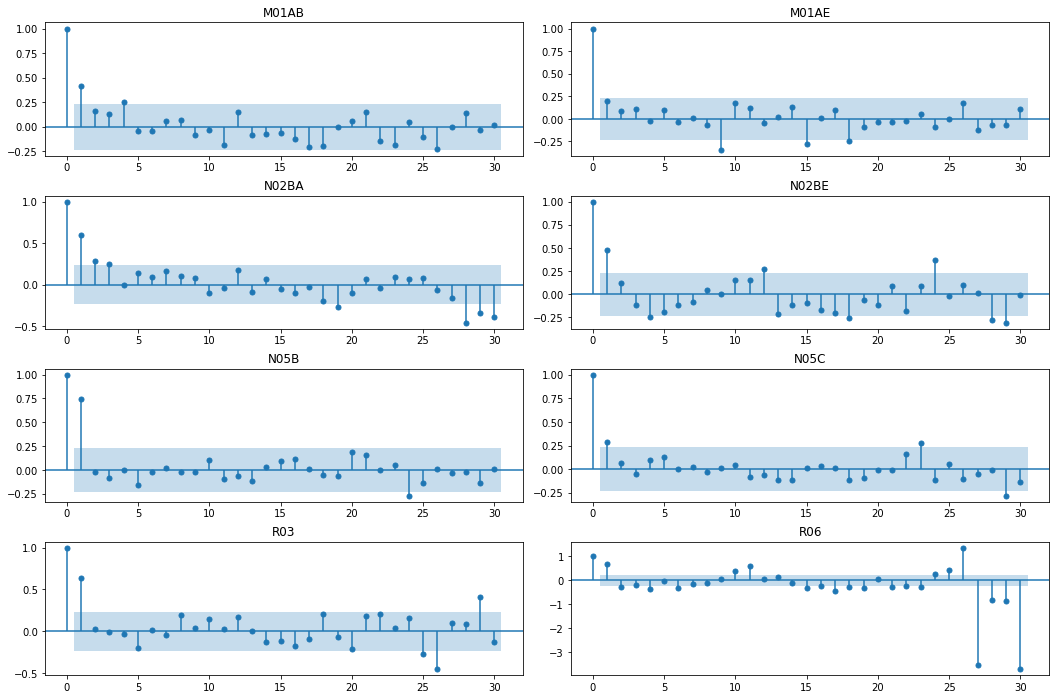

In [44]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

subplotindex=0
numrows=4
numcols=2
fig, ax = plt.subplots(numrows, numcols, figsize=(18,12))
plt.subplots_adjust(wspace=0.1, hspace=0.3)
with plt.rc_context():
    plt.rc("figure", figsize=(14,6))
    for x in ['M01AB','M01AE','N02BA','N02BE', 'N05B','N05C','R03','R06']:
        rowindex=math.floor(subplotindex/numcols)
        colindex=subplotindex-(rowindex*numcols)
        plot_pacf(data_m[x], lags=30, title=x, ax=ax[rowindex,colindex])
        subplotindex=subplotindex+1

#### ACF for Weekly data

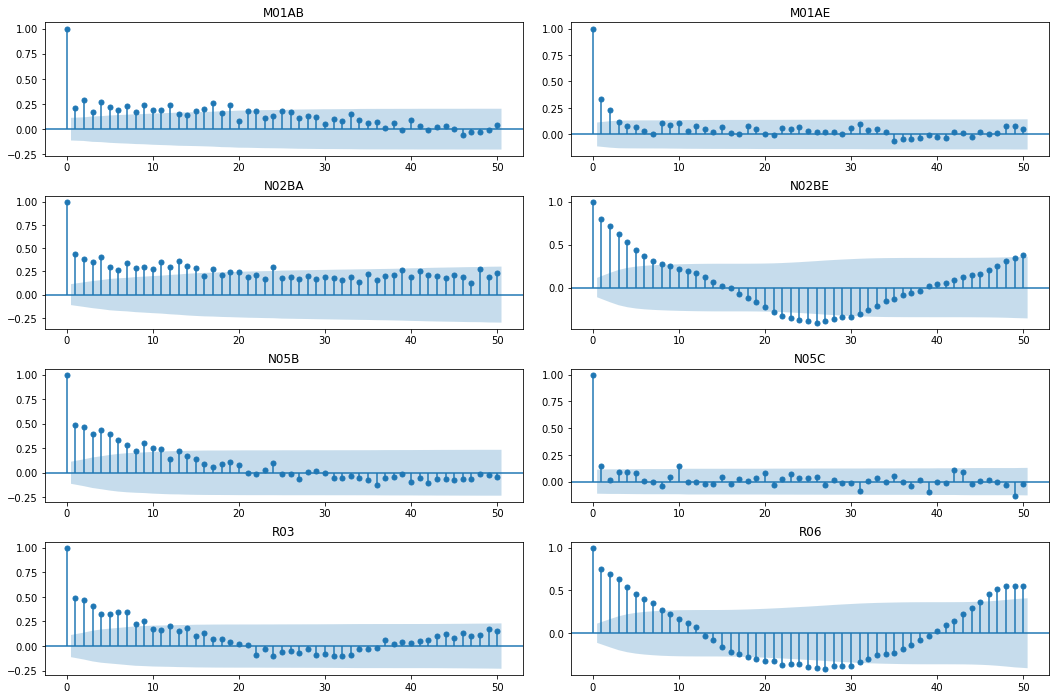

In [45]:
subplotindex=0
numrows=4
numcols=2
fig, ax = plt.subplots(numrows, numcols, figsize=(18,12))
plt.subplots_adjust(wspace=0.1, hspace=0.3)
with plt.rc_context():
    plt.rc("figure", figsize=(18,12))
    for x in ['M01AB','M01AE','N02BA','N02BE', 'N05B','N05C','R03','R06']:
        rowindex=math.floor(subplotindex/numcols)
        colindex=subplotindex-(rowindex*numcols)
        plot_acf(data_w[x], lags=50, title=x, ax=ax[rowindex,colindex])
        subplotindex=subplotindex+1

In general, the "partial" correlation between two variables is the amount of correlation between them which is not explained by their mutual correlations with a specified set of other variables. For example, if we are regressing a variable Y on other variables X1, X2, and X3, the partial correlation between Y and X3 is the amount of correlation between Y and X3 that is not explained by their common correlations with X1 and X2.

#### PACF for Weekly data

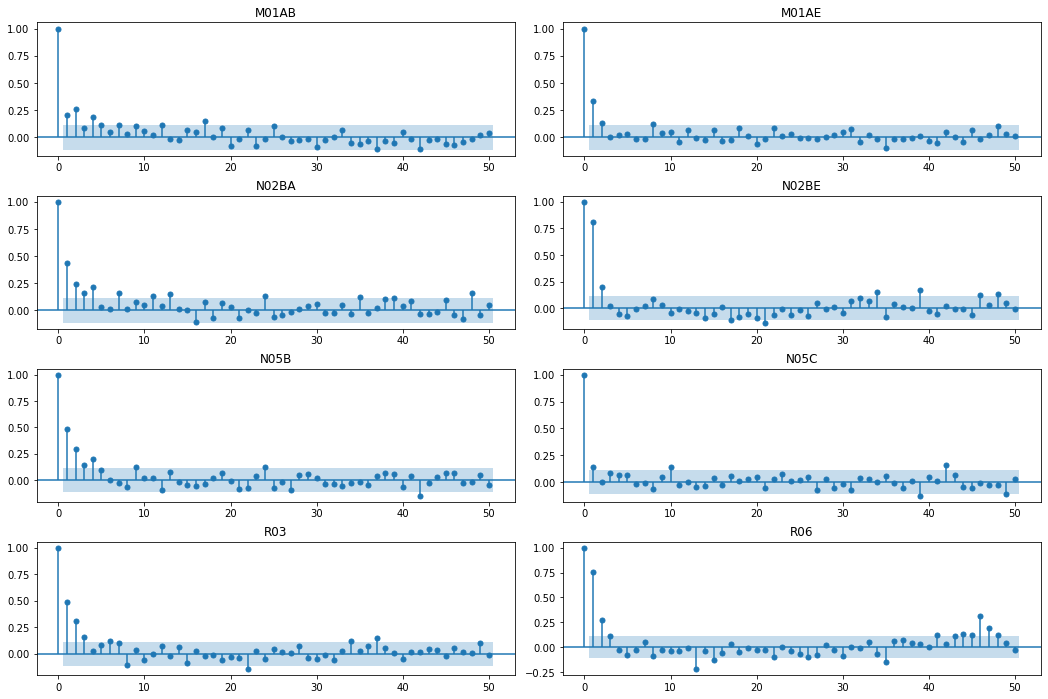

In [46]:
subplotindex=0
numrows=4
numcols=2
fig, ax = plt.subplots(numrows, numcols, figsize=(18,12))
plt.subplots_adjust(wspace=0.1, hspace=0.3)
with plt.rc_context():
    plt.rc("figure", figsize=(14,6))
    for x in ['M01AB','M01AE','N02BA','N02BE', 'N05B','N05C','R03','R06']:
        rowindex=math.floor(subplotindex/numcols)
        colindex=subplotindex-(rowindex*numcols)
        plot_pacf(data_w[x], lags=50, title=x, ax=ax[rowindex,colindex])
        subplotindex=subplotindex+1

#### ACF for Daily data

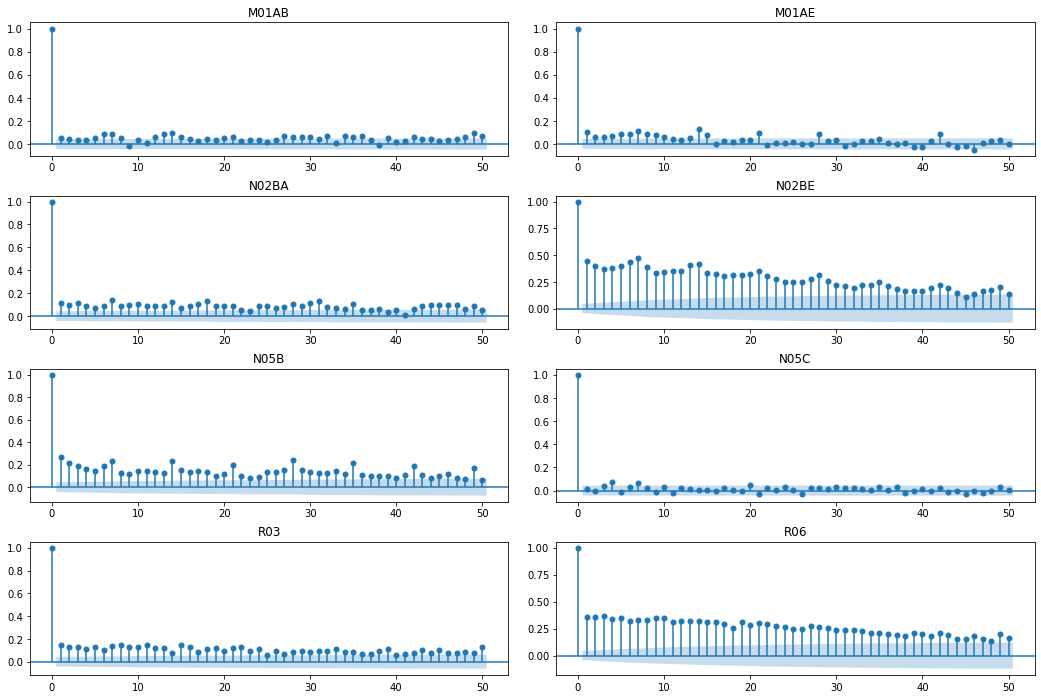

In [47]:
subplotindex=0
numrows=4
numcols=2
fig, ax = plt.subplots(numrows, numcols, figsize=(18,12))
plt.subplots_adjust(wspace=0.1, hspace=0.3)
with plt.rc_context():
    plt.rc("figure", figsize=(18,12))
    for x in ['M01AB','M01AE','N02BA','N02BE', 'N05B','N05C','R03','R06']:
        rowindex=math.floor(subplotindex/numcols)
        colindex=subplotindex-(rowindex*numcols)
        plot_acf(data_d[x], lags=50, title=x, ax=ax[rowindex,colindex])
        subplotindex=subplotindex+1

#### PACF for Daily data

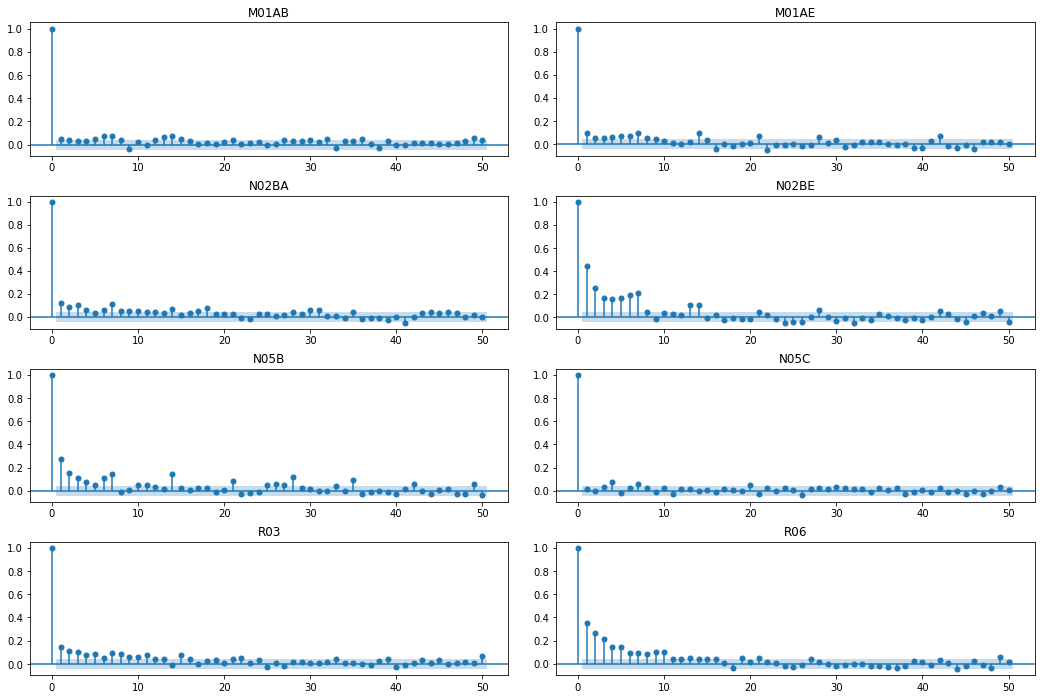

In [48]:
subplotindex=0
numrows=4
numcols=2
fig, ax = plt.subplots(numrows, numcols, figsize=(18,12))
plt.subplots_adjust(wspace=0.1, hspace=0.3)
with plt.rc_context():
    plt.rc("figure", figsize=(14,6))
    for x in ['M01AB','M01AE','N02BA','N02BE', 'N05B','N05C','R03','R06']:
        rowindex=math.floor(subplotindex/numcols)
        colindex=subplotindex-(rowindex*numcols)
        plot_pacf(data_d[x], lags=50, title=x, ax=ax[rowindex,colindex])
        subplotindex=subplotindex+1

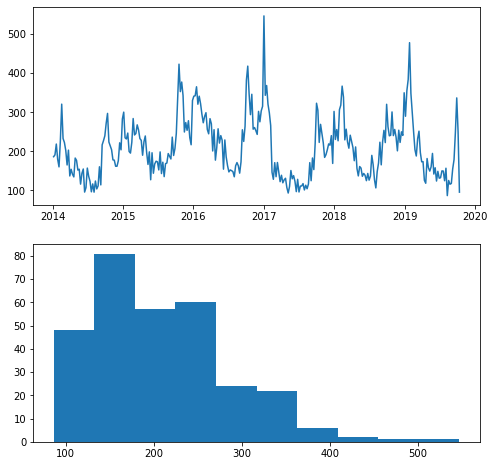

In [49]:
pyplot.subplot(211)
pyplot.plot(data_w['N02BE'])
# histogram
pyplot.subplot(212)
pyplot.hist(data_w['N02BE'])
pyplot.show()

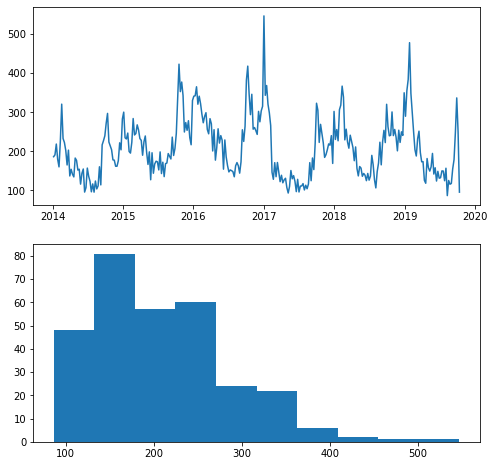

In [50]:
from matplotlib import pyplot

pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(data_w['N02BE'])
# histogram
pyplot.subplot(212)
pyplot.hist(data_w['N02BE'])
pyplot.show()

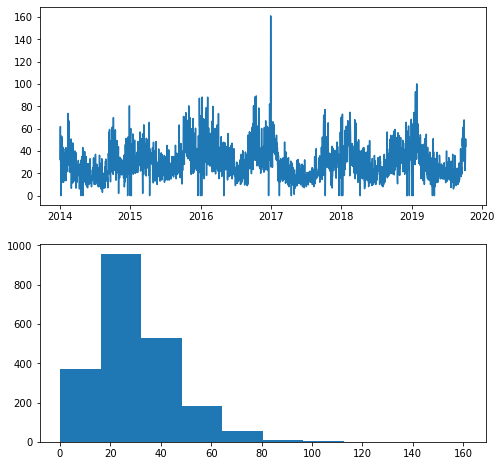

In [51]:
pyplot.subplot(211)
pyplot.plot(data_d['N02BE'])
# histogram
pyplot.subplot(212)
pyplot.hist(data_d['N02BE'])
pyplot.show()

## Data distribution analysis

Data distribution analysis
Chart with daily sales for different categories of interest is shown below. N02BE and N05B charts, though showing the similar trends, are suppresed because of the larger scale which makes the other illustrations less readable.

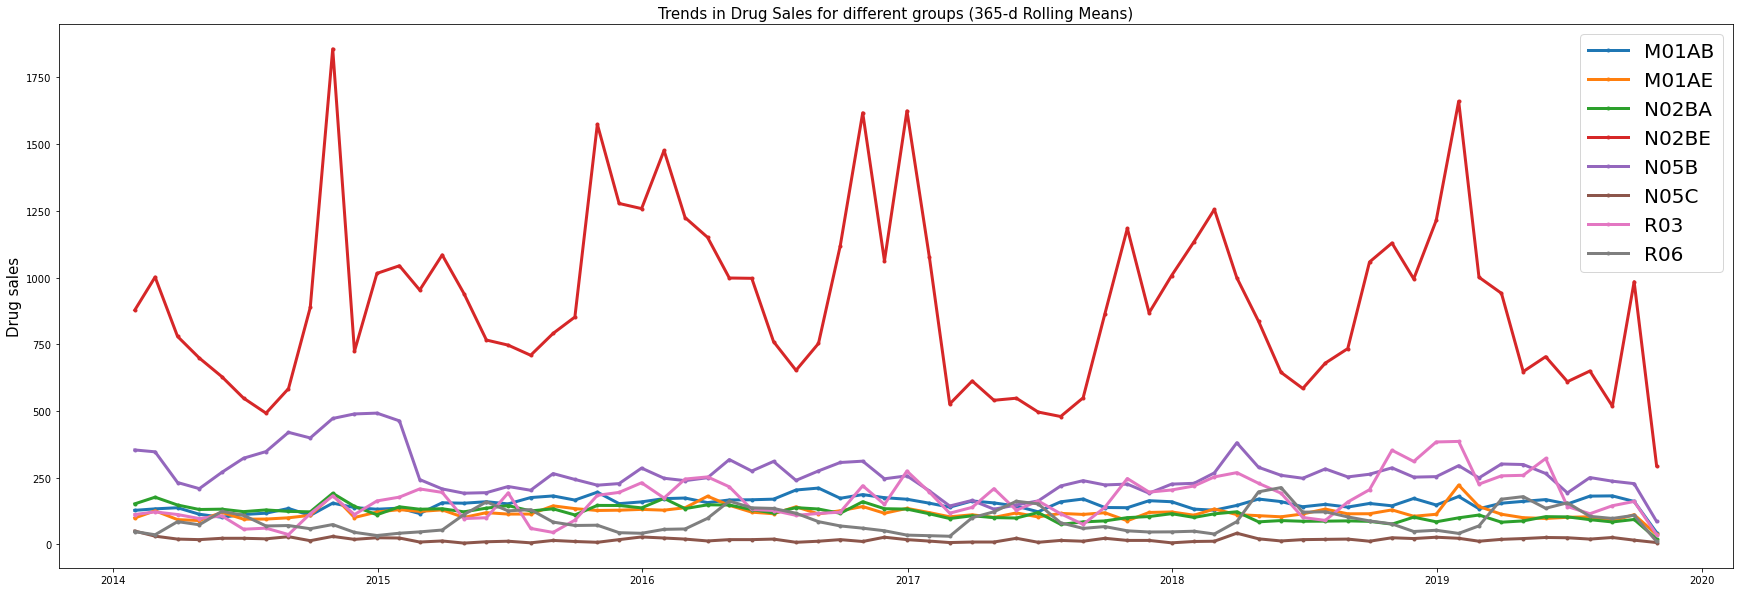

In [52]:
fig, ax = plt.subplots(figsize=(30, 10))
for nm in cols_plot:
    ax.plot(data_m[nm], label=nm, marker='.', linestyle='-', linewidth=3)
    ax.legend(prop={'size': 20})
    ax.set_ylabel('Drug sales', fontsize=15)
    ax.set_title('Trends in Drug Sales for different groups (365-d Rolling Means)', fontsize=15);

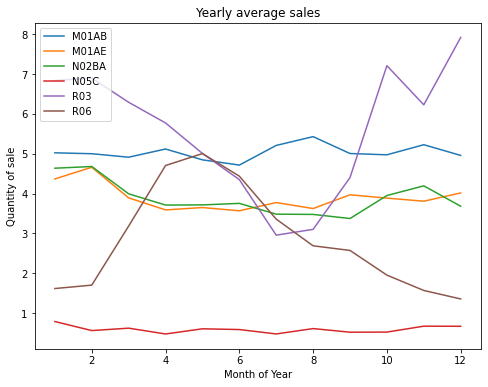

In [53]:
[data_d.groupby(data_d.index.month)[i].mean().plot(figsize=(8,6)) for i in ['M01AB', 'M01AE', 'N02BA', 'N05C', 'R03', 'R06']]

plt.title('Yearly average sales')
plt.xlabel('Month of Year')
plt.ylabel('Quantity of sale')

plt.legend(['M01AB', 'M01AE', 'N02BA', 'N05C', 'R03', 'R06'], loc='upper left')

plt.show()

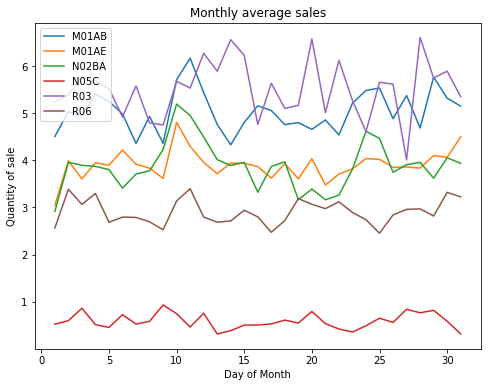

In [54]:
[data_d.groupby(data_d.index.day)[nm].mean().plot(figsize=(8,6)) for nm in ['M01AB', 'M01AE', 'N02BA', 'N05C', 'R03', 'R06']]

plt.title('Monthly average sales')
plt.xlabel('Day of Month')
plt.ylabel('Quantity of sale')

plt.legend(['M01AB', 'M01AE', 'N02BA', 'N05C', 'R03', 'R06'], loc='upper left')

plt.show()

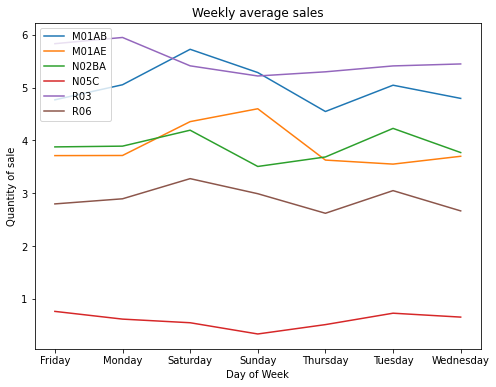

In [55]:
[data_d.groupby(data_d.index.day_name())[nm].mean().plot(figsize=(8,6)) for nm in ['M01AB', 'M01AE', 'N02BA', 'N05C', 'R03', 'R06']]

plt.title('Weekly average sales')
plt.xlabel('Day of Week')
plt.ylabel('Quantity of sale')

plt.legend(['M01AB', 'M01AE', 'N02BA', 'N05C', 'R03', 'R06'], loc='upper left')

plt.show()

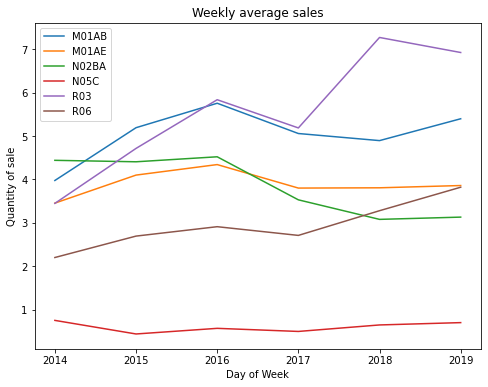

In [56]:
[data_d.groupby(data_d.index.year)[nm].mean().plot(figsize=(8,6)) for nm in ['M01AB', 'M01AE', 'N02BA', 'N05C', 'R03', 'R06']]

plt.title('Weekly average sales')
plt.xlabel('Day of Week')
plt.ylabel('Quantity of sale')

plt.legend(['M01AB', 'M01AE', 'N02BA', 'N05C', 'R03', 'R06'], loc='upper left')

plt.show()

## Normality check

### QQ-plot

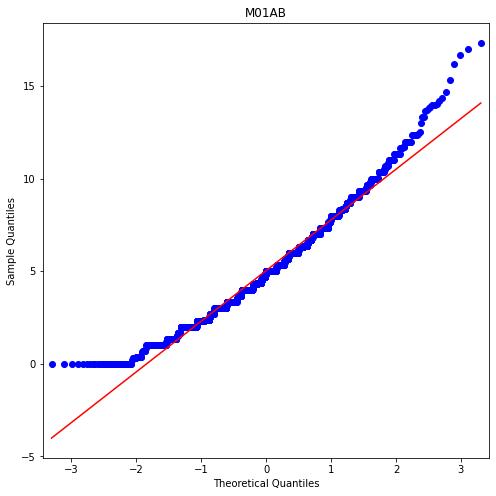

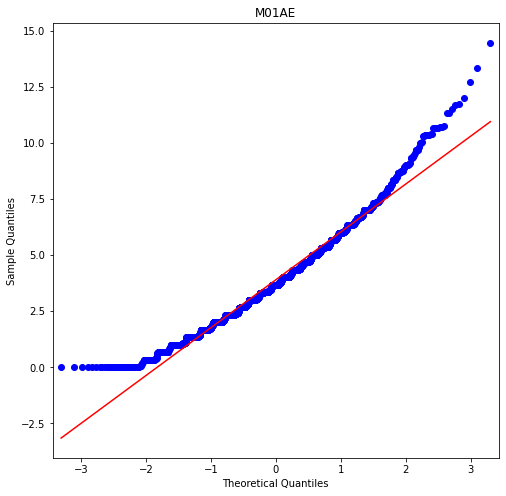

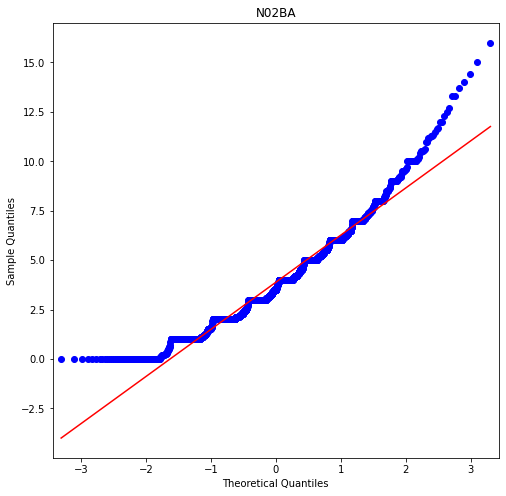

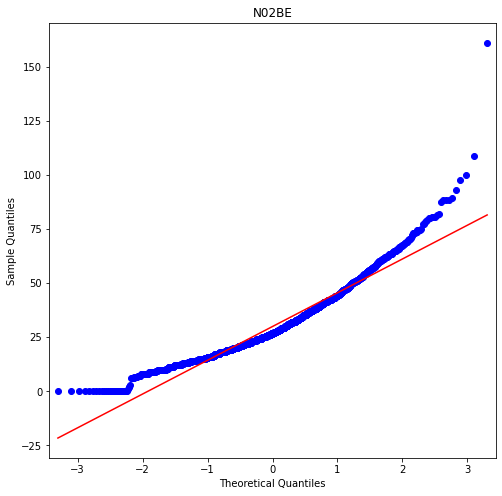

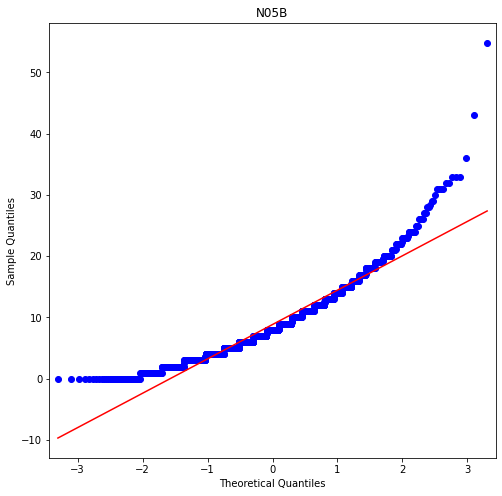

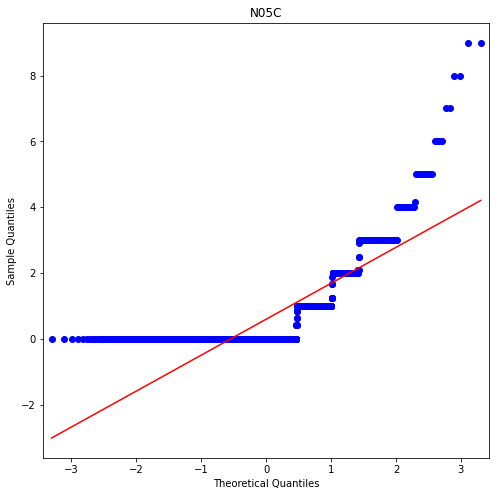

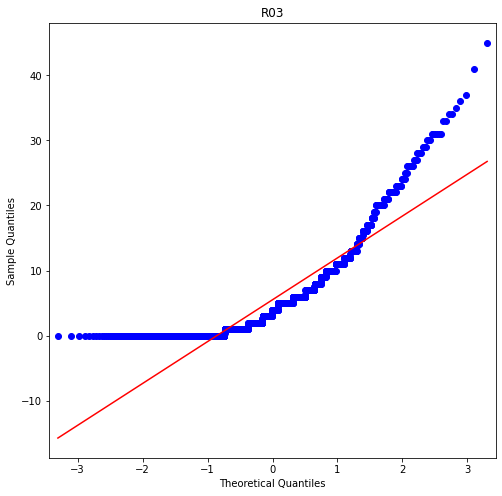

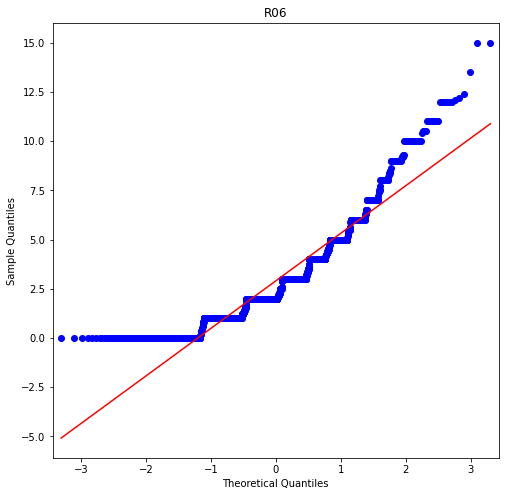

In [57]:
from statsmodels.graphics.gofplots import qqplot

for col in cols_plot:
    qqplot(data_d[col], line='s')
    plt.title(col)
    plt.show()

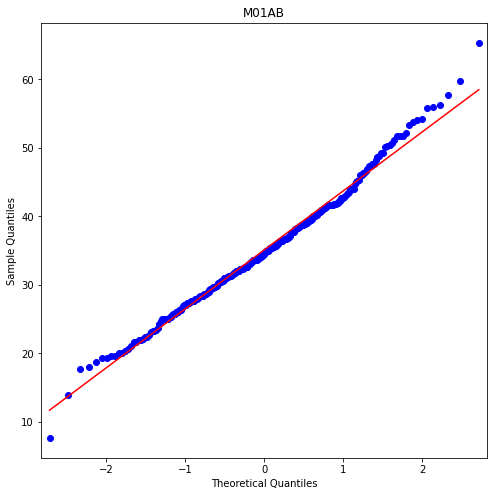

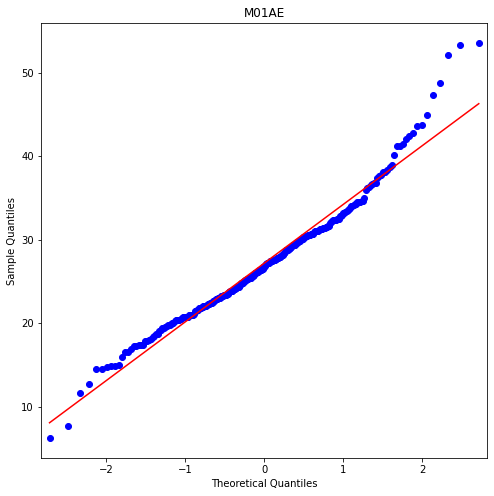

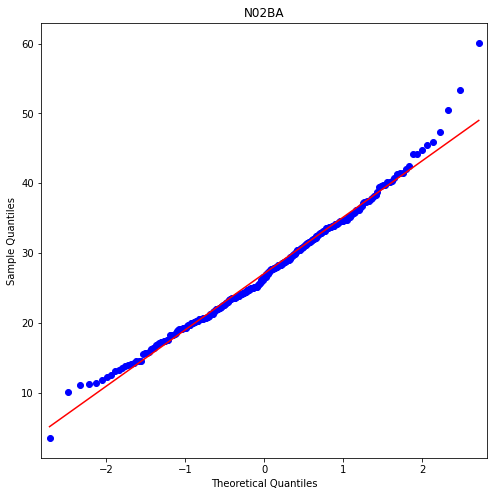

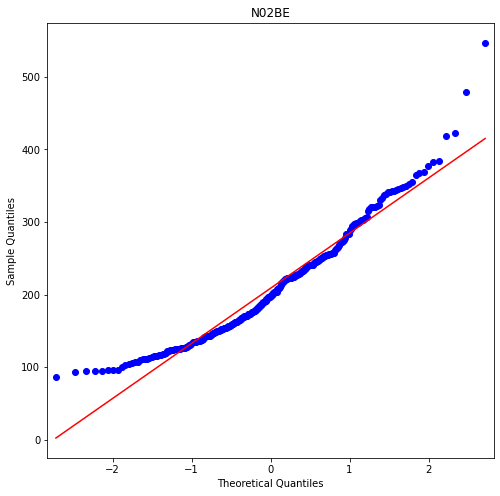

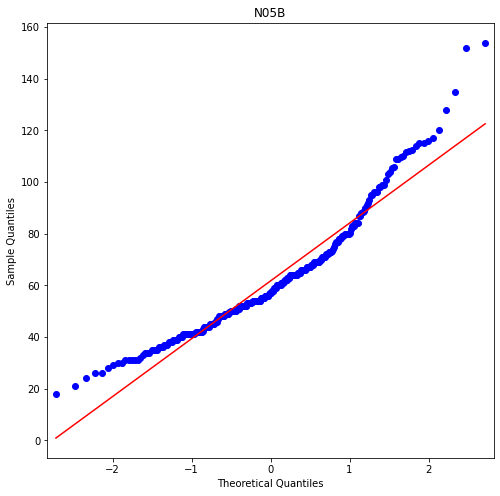

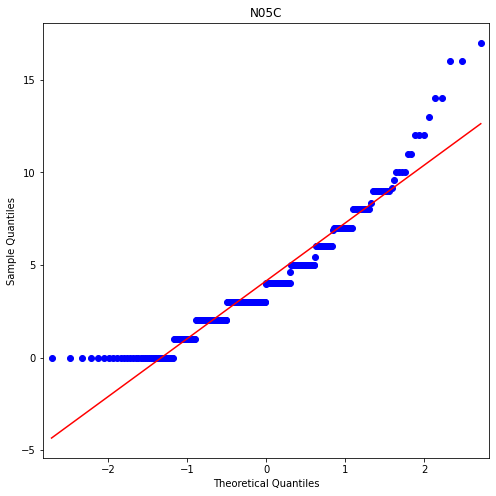

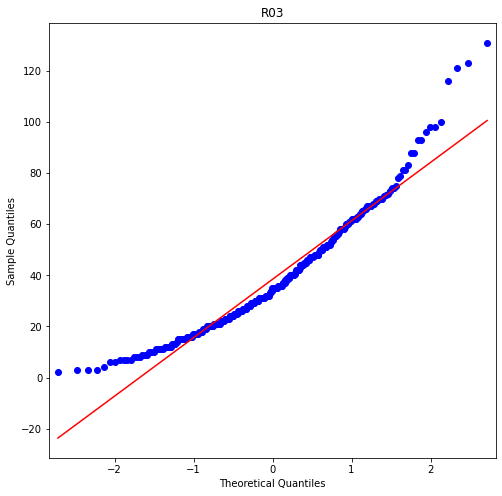

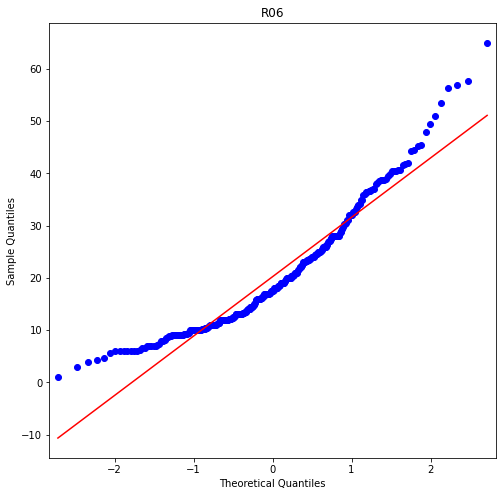

In [58]:
for col in cols_plot:
    qqplot(data_w[col], line='s')
    plt.title(col)
    plt.show()

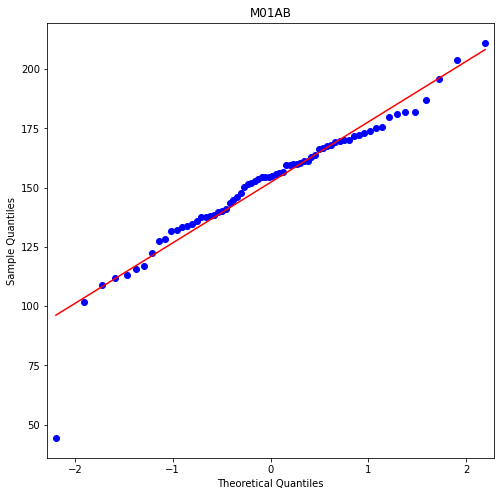

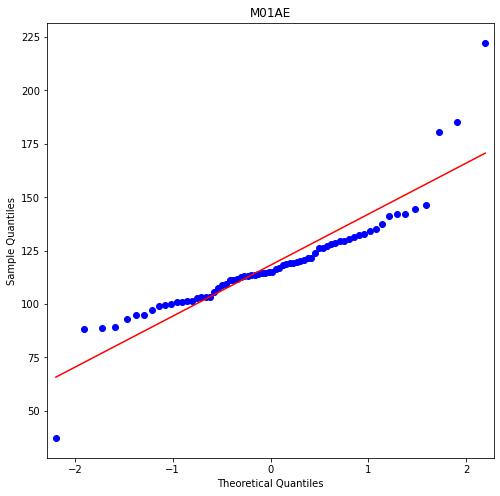

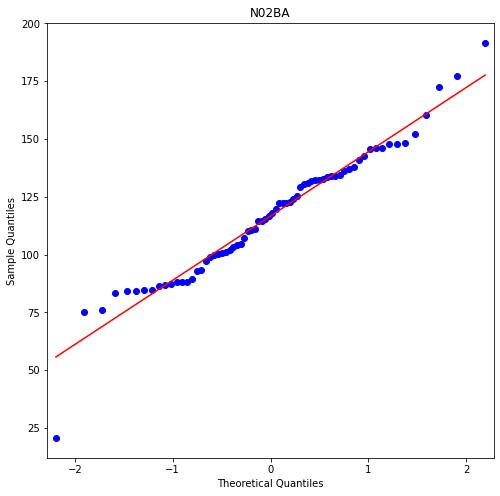

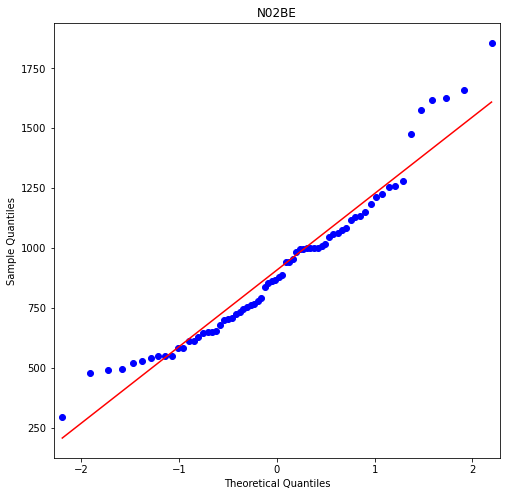

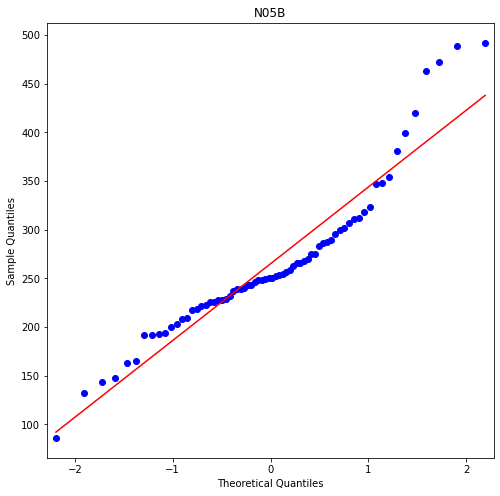

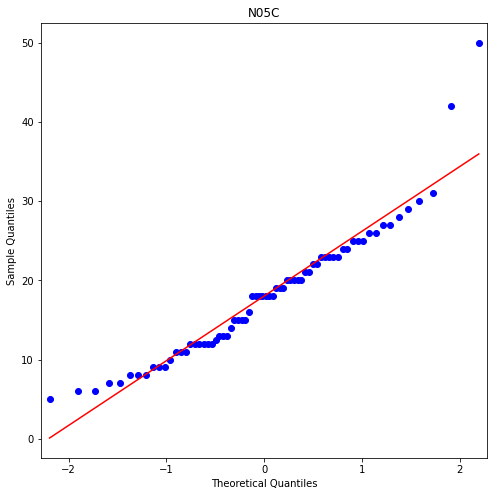

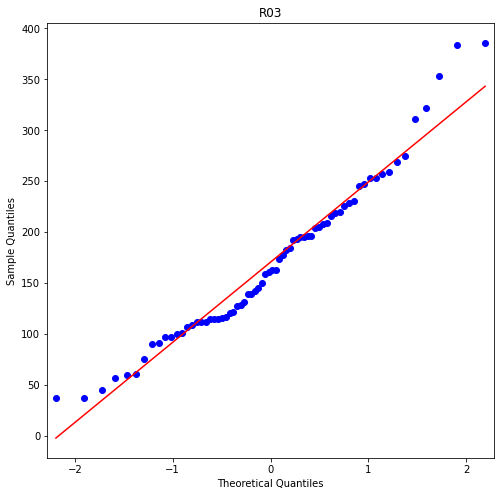

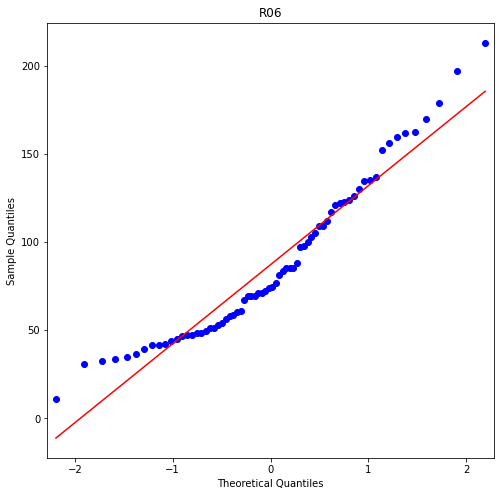

In [59]:
for col in cols_plot:
    qqplot(data_m[col], line='s')
    plt.title(col)
    plt.show()

### Anderson-Darling test

A feature of the Anderson-Darling test is that it returns a list of critical values rather than a single p-value. This can provide the basis for a more thorough interpretation of the result.

In [60]:
from scipy.stats import anderson

for col in cols_plot:
    result = anderson(data_d[col])
    print('\n\nDoes '+col+' look normal?')
    print('Statistic: %.3f' % result.statistic)
    p = 0
    for i in range(len(result.critical_values)):
        sl, cv = result.significance_level[i], result.critical_values[i]
        if result.statistic < result.critical_values[i]:
            print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
        else:
            print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))



Does M01AB look normal?
Statistic: 10.766
15.000: 0.575, data does not look normal (reject H0)
10.000: 0.655, data does not look normal (reject H0)
5.000: 0.786, data does not look normal (reject H0)
2.500: 0.916, data does not look normal (reject H0)
1.000: 1.090, data does not look normal (reject H0)


Does M01AE look normal?
Statistic: 10.645
15.000: 0.575, data does not look normal (reject H0)
10.000: 0.655, data does not look normal (reject H0)
5.000: 0.786, data does not look normal (reject H0)
2.500: 0.916, data does not look normal (reject H0)
1.000: 1.090, data does not look normal (reject H0)


Does N02BA look normal?
Statistic: 19.360
15.000: 0.575, data does not look normal (reject H0)
10.000: 0.655, data does not look normal (reject H0)
5.000: 0.786, data does not look normal (reject H0)
2.500: 0.916, data does not look normal (reject H0)
1.000: 1.090, data does not look normal (reject H0)


Does N02BE look normal?
Statistic: 29.932
15.000: 0.575, data does not look norm

In [61]:
for col in cols_plot:
    result = anderson(data_w[col])
    print('\n\nDoes '+col+' look normal?')
    print('Statistic: %.3f' % result.statistic)
    p = 0
    for i in range(len(result.critical_values)):
        sl, cv = result.significance_level[i], result.critical_values[i]
        if result.statistic < result.critical_values[i]:
            print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
        else:
            print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))



Does M01AB look normal?
Statistic: 0.730
15.000: 0.569, data does not look normal (reject H0)
10.000: 0.648, data does not look normal (reject H0)
5.000: 0.777, data looks normal (fail to reject H0)
2.500: 0.906, data looks normal (fail to reject H0)
1.000: 1.078, data looks normal (fail to reject H0)


Does M01AE look normal?
Statistic: 1.671
15.000: 0.569, data does not look normal (reject H0)
10.000: 0.648, data does not look normal (reject H0)
5.000: 0.777, data does not look normal (reject H0)
2.500: 0.906, data does not look normal (reject H0)
1.000: 1.078, data does not look normal (reject H0)


Does N02BA look normal?
Statistic: 0.627
15.000: 0.569, data does not look normal (reject H0)
10.000: 0.648, data looks normal (fail to reject H0)
5.000: 0.777, data looks normal (fail to reject H0)
2.500: 0.906, data looks normal (fail to reject H0)
1.000: 1.078, data looks normal (fail to reject H0)


Does N02BE look normal?
Statistic: 3.356
15.000: 0.569, data does not look normal (

In [62]:
for col in cols_plot:
    result = anderson(data_m[col])
    print('\n\nDoes '+col+' look normal?')
    print('Statistic: %.3f' % result.statistic)
    p = 0
    for i in range(len(result.critical_values)):
        sl, cv = result.significance_level[i], result.critical_values[i]
        if result.statistic < result.critical_values[i]:
            print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
        else:
            print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))



Does M01AB look normal?
Statistic: 0.677
15.000: 0.548, data does not look normal (reject H0)
10.000: 0.624, data does not look normal (reject H0)
5.000: 0.748, data looks normal (fail to reject H0)
2.500: 0.873, data looks normal (fail to reject H0)
1.000: 1.038, data looks normal (fail to reject H0)


Does M01AE look normal?
Statistic: 2.213
15.000: 0.548, data does not look normal (reject H0)
10.000: 0.624, data does not look normal (reject H0)
5.000: 0.748, data does not look normal (reject H0)
2.500: 0.873, data does not look normal (reject H0)
1.000: 1.038, data does not look normal (reject H0)


Does N02BA look normal?
Statistic: 0.502
15.000: 0.548, data looks normal (fail to reject H0)
10.000: 0.624, data looks normal (fail to reject H0)
5.000: 0.748, data looks normal (fail to reject H0)
2.500: 0.873, data looks normal (fail to reject H0)
1.000: 1.038, data looks normal (fail to reject H0)


Does N02BE look normal?
Statistic: 0.937
15.000: 0.548, data does not look normal (

## Power transformation

In [63]:
from scipy.stats import boxcox

def power_transform(data, c=0):
    series = data
    
    plt.figure(figsize=(12,5))
    # line plot
    pyplot.subplot(121)
    plt.title('Before Transformation')
    pyplot.plot(data)
    
    # histogram
    pyplot.subplot(122)
    pyplot.hist(data)
    pyplot.show()
    
    qqplot(data, line='s')
    plt.show()
    
    dataframe = pd.DataFrame(series.values+c)
    dataframe.columns = ['Qty']
    dataframe['Qty'], lam = boxcox(dataframe['Qty'])
    print('Lambda: %f' % lam)
    
    
    plt.figure(figsize=(12,5))
    # line plot
    pyplot.subplot(121)
    plt.title('After Transformation')
    pyplot.plot(dataframe['Qty'])
    
    # histogram
    pyplot.subplot(122)
    pyplot.hist(dataframe['Qty'])
    pyplot.show()
    
    qqplot(dataframe['Qty'], line='s')
    plt.show()
    
    
    result = anderson(dataframe['Qty'])
    print('\n\nDoes data look Normal after Transformation?')
    print('Statistic: %.3f' % result.statistic)
    p = 0
    for i in range(len(result.critical_values)):
        sl, cv = result.significance_level[i], result.critical_values[i]
        if result.statistic < result.critical_values[i]:
            print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
        else:
            print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

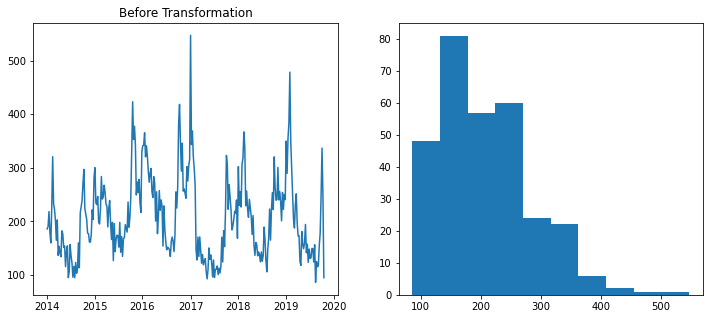

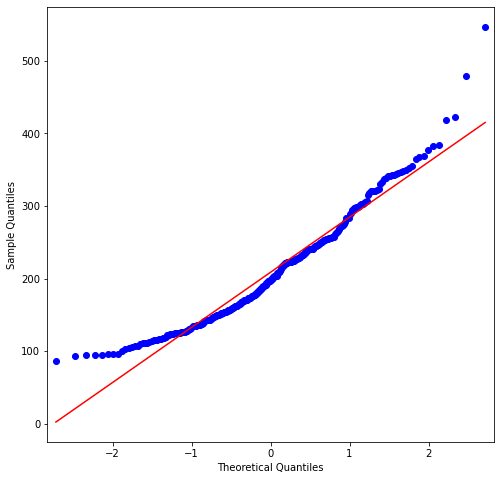

Lambda: -0.028347


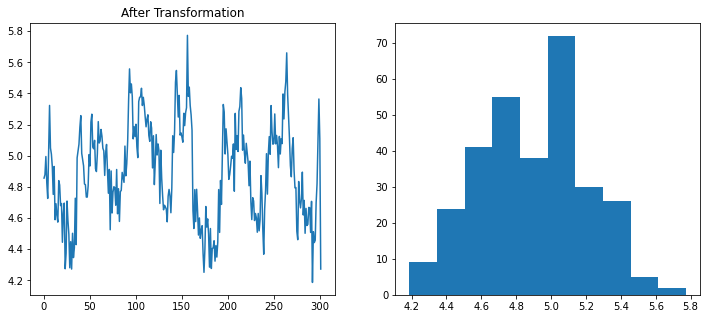

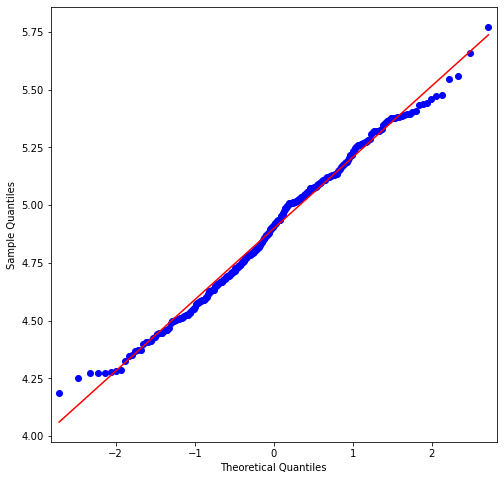



Does data look Normal after Transformation?
Statistic: 0.892
15.000: 0.569, data does not look normal (reject H0)
10.000: 0.648, data does not look normal (reject H0)
5.000: 0.777, data does not look normal (reject H0)
2.500: 0.906, data looks normal (fail to reject H0)
1.000: 1.078, data looks normal (fail to reject H0)


In [64]:
power_transform(data_w['N02BE'])